<a href="https://colab.research.google.com/github/wav0lav/lspower-24-25/blob/main/FilteringClinic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import random
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import dates as d
# from matplotlib import pylab
# from matplotlib.colors import ListedColormap
import datetime
from datetime import date, timedelta
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import re
import seaborn as sns

Mount the Drive

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


# Cleaning and Aggregating Daily Data



daily averages

In [ ]:
# # Filename here
# # Currently looking at problematic wells from 06/23, which is ~ in the middle of my assigned data (May 9-July 23)

# # Repeat for next file

# # This function filters and combines daily data from each of the dates
# def data_filtering(dates, search_path):
#   df = pd.DataFrame()
#   list_of_frames = []
#   header_date_change = pd.to_datetime('2023-08-29')
#   for i in range(len(dates)):
#     filename = 'Landfill Group, TCPP, Honea Path, SC - '
#     filename_2 = dates[i]
#     filename = filename + filename_2 + '.xlsx'
#     # Search for the file
#     file_path = os.path.join(search_path, filename)

#     print(dates[i])
#     if (pd.to_datetime(dates[i]) < header_date_change):
#       df2 = pd.read_excel(file_path, header=3)
#     else:
#       df2 = pd.read_excel(file_path, header=5)

#     # # Data filtering

#     df2.replace({'--': np.nan}, inplace=True)
#     df2.replace({'NR': np.nan, 'F': np.nan, 'missing': np.nan}, inplace=True)

#     # get rid of misc. rows or completely broken wells (TODO: might fix later to only get rid of misc. rows)
#     x = (df2[df2['Follow Up Priority'] == 'Green'].index)
#     y =  ((df2[df2['Follow Up Priority'] == 'Yellow'].index))
#     x = x.append(y)
#     df2 = df2.drop(df2.index.difference(x))

#     df2.loc[:, 'CH4 (%)'] = df2['CH4 (%)'].astype(float)
#     df2.loc[:, 'O2 (%)'] = df2['O2 (%)'].astype(float)
#     df2.loc[:, 'Flow Ch. (SCFM)'] = df2['Flow Ch. (SCFM)'].astype(float)
#     df2.loc[:, 'PA ("H2O)'] = df2['PA ("H2O)'].astype(float)
#     df2['day'] = dates[i]

#     list_of_frames.append(df2)
#   df = pd.concat(list_of_frames)
#   return df

# # THIS function takes in a date and finds all the existing files
# def existing_times(start, numdays, search_path):
#   # INPUT: start is date as a string d-m-Y

#   # initializing date
#   test_date = datetime.datetime.strptime(start, "%Y-%m-%d")

#   # initializing K
#   K = numdays
#   date_generated = pd.date_range(test_date, periods=K)

#   df = pd.DataFrame()
#   list_of_valid_dates = []

#   for i in range(len(date_generated)):
#     filename = 'Landfill Group, TCPP, Honea Path, SC - '
#     filename_2 = str(date_generated[i])
#     filename = filename + str(filename_2)[:-9] + '.xlsx'
#     file_path = os.path.join(search_path, filename)
#     if os.path.exists(file_path):
#       list_of_valid_dates.append(str(date_generated[i])[:-9])

#   print(len(list_of_valid_dates))
#   return list_of_valid_dates



# # initializing date
# search_path = '/content/gdrive/Shareddrives/LSPowerData/DailyStatusReports'
# start = "2022-06-07" #USER: Input start date you want for aggregated data
# num_days = 900
# dates = existing_times(start, num_days, search_path) #USER: second input is number of days from start date you want aggregated
# dates

# daily_averages_df = data_filtering(dates, search_path)
# daily_averages_df.reset_index(inplace=True)
# daily_averages_df

In [ ]:
# daily_averages_df.to_csv('/content/gdrive/Shareddrives/LSPowerData/aggregatedDailyAverages.csv', index=False)

individual data

In [ ]:
# search_path = '/content/gdrive/Shareddrives/LSPowerData/IndividualWellData'

# files = os.listdir(search_path)
# data_list = []

# for file in files:
#     file_path = os.path.join(search_path, file)

#     if file.endswith('.csv'):
#         try:
#             with open(file_path, 'r') as f:
#                 lines = f.readlines()
#                 header_cell_value = lines[4].strip()

#             data = pd.read_csv(file_path, skiprows=6, on_bad_lines='skip')  # Skip problematic lines
#             data['Well'] = header_cell_value
#             data_list.append(data)  # Append the data to the list
#         except Exception as e:
#             print(f"Error reading {file}: {e}")

# # Step 7: Concatenate all DataFrames safely
# if data_list:
#     individual_data_df = pd.concat(data_list, ignore_index=True)

# # print("Aggregation complete. The aggregated data is saved.")

# individual_data_df

# # TODO: ASK If should do this? !! + STILL GETTTING error
# individual_data_df = individual_data_df.replace({'--': np.nan, 'NR': np.nan, 'missing': np.nan, 'F': np.nan})
# individual_data_df  = individual_data_df.infer_objects(copy=False)

# individual_data_df

In [ ]:
# individual_data_df["day"] = (pd.to_datetime(individual_data_df['Timestamp (US/Eastern)']).dt).strftime('%Y-%m-%d')
# individual_data_df.to_csv('/content/gdrive/Shareddrives/LSPowerData/aggregatedIndividualData.csv', index=False)

merging sheets

In [ ]:
# merged_df = pd.merge(individual_data_df, daily_averages_df[['Well', 'day', 'Follow Up Priority']], on=['day', 'Well'], how='left')
# merged_df.to_csv('/content/gdrive/Shareddrives/LSPowerData/aggregatedIndividualAndDaily.csv', index=False)

# RUN THIS BEFORE EVERY PROGRAM

getting data sets

In [ ]:
daily_averages_df = pd.read_csv('/content/gdrive/Shareddrives/LSPowerData/aggregatedDailyAverages.csv')
individual_data_df = pd.read_csv('/content/gdrive/Shareddrives/LSPowerData/aggregatedIndividualData.csv', low_memory=False)
merged_df = pd.read_csv('/content/gdrive/Shareddrives/LSPowerData/aggregatedIndividualAndDaily.csv', low_memory=False)

functions for processing

In [ ]:
# THIS BLOCK HAS ALL THE FUNCTIONS FOR DATA FILTERING FOR INDIVIDUAL WELLS

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

# filters individual well data given a filename for an individual well
def data_filtering_individual(filename):
  search_path = '/content/gdrive/Shareddrives/LSPowerData/IndividualWellData'
  # Search for the file
  file_path = os.path.join(search_path, filename)
  df = pd.read_csv(file_path, header=6)

  df.replace({'NR': np.nan, 'missing': np.nan, 'F': np.nan}, inplace=True)
  df.replace({'--': np.nan}, inplace=True) #fake value can ignore and add plot limits if needed

  df.loc[:, 'CH4 (%)'] = df['CH4 (%)'].astype(float)
  df.loc[:, 'O2 (%)'] = df['O2 (%)'].astype(float)
  df.loc[:, 'LFG Temperature (F)'] = df['LFG Temperature (F)'].astype(float)
  df.loc[:, 'Bal. Gas (%)'] = df['Bal. Gas (%)'].astype(float)
  df.loc[:, 'Applied Vacuum - PA (in. H2O)'] = df['Applied Vacuum - PA (in. H2O)'].astype(float)
  df['Datetime'] = pd.to_datetime(df['Timestamp (US/Eastern)'])
  return df

  # Get Indices

# given the overall aggregated data frame + an individual well, outputs all the times the well is yellow
def find_yellow_times(df, well):
  y =  ((df[df['Follow Up Priority'] == 'Yellow'].index))
  n =  ((df[df['Well'] == well].index))
  intersect = intersection(y, n)

  # time_list is a list of days where the well has yellow readings
  time_list = []
  for i in range(len(intersect)):
    time_list.append(df.loc[intersect[i], 'day'])
  return time_list

# Find indices in individual well data of specific start and end time
def get_time_period(df, start, end):
  # Getse start + end time (!!)
  dt = df['Datetime']
  time1 = pd.to_datetime(start) #date 1
  index = np.searchsorted(dt, time1)

  # TODO: make an end variable
  time2 = pd.to_datetime(end) # date 2
  index2 = np.searchsorted(dt, time2) + 1
  return (index, index2)

# Find indices in individual well data from when well was broken
# Useful for plotting
def broken_list(df, time_list):
  dt = df['Datetime']
  broken = []
  for i in range(len(time_list)):
    time = pd.to_datetime(time_list[i]) #date 1
    broken.append(np.searchsorted(dt, time))
  return broken


def find_intersection(lists):
    """Finds the intersection of multiple lists."""

    if not lists:
        return []

    # Convert lists to sets for efficient intersection
    sets = [set(lst) for lst in lists]

    # Find the intersection using the intersection method
    result = sets[0].intersection(*sets[1:])

    return list(result)


def find_union(lists):
    """Finds the intersection of multiple lists."""

    if not lists:
        return []

    # Convert lists to sets for efficient intersection
    sets = [set(lst) for lst in lists]

    # Find the intersection using the intersection method
    result = sets[0].union(*sets[1:])

    return list(result)

In [ ]:
# daily_averages_df = pd.read_csv('/content/gdrive/Shareddrives/LSPowerData/aggregatedDailyAverages.csv')
# individual_data_df = pd.read_csv('/content/gdrive/Shareddrives/LSPowerData/aggregatedIndividualData.csv', low_memory=False)
merged_df = pd.read_csv('/content/gdrive/Shareddrives/LSPowerData/aggregatedIndividualAndDaily.csv', low_memory=False)

In [ ]:
merged_df_temp = merged_df.copy()
merged_df = merged_df[~merged_df['Well'].str.startswith('HEADER')]
merged_df = merged_df[~merged_df['Well'].str.startswith('INLET')]
merged_df.reset_index(inplace=True)

In [ ]:
# This cell just removes nan follow up priority values, essentially any wells that need to be moved
# TODO: might need to come back to do this to decide if it is something we should actually be doing

yellow_indices = merged_df[merged_df["Follow Up Priority"] == "Yellow"].index
green_indices = merged_df[merged_df["Follow Up Priority"] == "Green"].index
nan_indices = merged_df[merged_df["Follow Up Priority"].isna()].index
yellow_df = merged_df.iloc[yellow_indices]
green_df = merged_df.iloc[green_indices]
# n = merged_df.iloc[nan_indices]

# getting rid of non existing values of Follow Up Priority
merged_df = pd.concat([yellow_df, green_df])
merged_df.reset_index(inplace=True)
merged_df

,level_0,index,Timestamp (US/Eastern),CH4 (%),CO2 (%),O2 (%),Bal. Gas (%),LFG Flow (SCFM),LFG Temperature (F),Applied Vacuum - PA (in. H2O),Available Vacuum - PB (in. H2O),Static Pressure - PS (in. H2O),Valve Position (%),Liquid Column (feet),Well,day,Follow Up Priority
0,568,7580,2022-12-26 07:02:50,57.3,39.9,0.3,2.5,55.4,85.8,-6.3,-5.8,NaN,74.9,NaN,TCLC-412,2022-12-26,Yellow
1,569,7581,2022-12-28 11:18:09,57.8,41.0,0.2,1.1,69.5,89.9,-10.2,-14.0,NaN,74.9,NaN,TCLC-412,2022-12-28,Yellow
2,570,7582,2022-12-28 14:23:31,58.0,41.1,0.1,0.8,67.9,89.4,-9.7,-14.2,NaN,73.7,NaN,TCLC-412,2022-12-28,Yellow
3,571,7583,2022-12-28 17:32:20,58.0,41.2,0.0,0.8,69.4,88.8,-10.0,-14.3,NaN,74.5,NaN,TCLC-412,2022-12-28,Yellow
4,572,7584,2022-12-28 20:48:17,55.0,39.2,0.3,5.4,70.0,88.5,-10.5,-13.4,NaN,75.3,NaN,TCLC-412,2022-12-28,Yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744033,1186320,1193332,2024-08-31 20:49:19,52.1,43.4,0.0,4.6,NaN,75.9,-4.2,-14.2,NaN,19.1,12.7,TCGW-001,2024-08-31,Green
744034,1186321,1193333,2024-08-31 21:09:58,NaN,NaN,NaN,NaN,NaN,76.0,-4.6,-14.3,NaN,18.0,NaN,TCGW-001,2024-08-31,Green
744035,1186322,1193334,2024-08-31 22:06:49,NaN,NaN,NaN,NaN,NaN,76.7,-5.0,-14.3,NaN,18.0,NaN,TCGW-001,2024-08-31,Green
744036,1186323,1193335,2024-08-31 23:03:48,NaN,NaN,NaN,NaN,NaN,75.4,-5.0,-14.1,NaN,18.0,NaN,TCGW-001,2024-08-31,Green


# (RUN) Filling in any rows (both yellow, green, & merged)

In [ ]:
# TODO: write a function for checking with col has 1 empty and filling it in (!!)

yellow_df = merged_df[merged_df["Follow Up Priority"] == "Yellow"]
green_df = merged_df[merged_df["Follow Up Priority"] == "Green"]

# find all the NaN in the CH4, CO2, O2, Bal.Gas
# If there is a row in which there are three out of four Nan Values, then fix (!!)

green_df_temp = green_df[['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. Gas (%)']].copy()
green_df_temp.loc[:,'NaN_Count'] = green_df_temp.isna().sum(axis=1)
green_df_temp

yellow_df_temp = yellow_df[['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. Gas (%)']].copy()
yellow_df_temp.loc[:,'NaN_Count'] = yellow_df_temp.isna().sum(axis=1)
yellow_df_temp

# get indices where there is 1 NaN values
indices = np.where(yellow_df_temp['NaN_Count'] == 1)[0]
yellow_df_temp.loc[indices]


# The result of this is empty, so commenting out for now with this data set (!!)
# indices = np.where(green_df_temp['NaN_Count'] == 1)[0]
# green_df_temp.loc[indices]

# ROW 2789 has Bal. Gas missing
# Since it is only one row, we are filling it in manually
yellow_df_temp.loc[indices, "Bal. Gas (%)"] = 100 - (
    yellow_df_temp.loc[indices, "CH4 (%)"] +
    yellow_df_temp.loc[indices, "CO2 (%)"] +
    yellow_df_temp.loc[indices, "O2 (%)"]
)

merged_df.loc[indices, "Bal. Gas (%)"] = 100 - (
    merged_df.loc[indices, "CH4 (%)"] +
    merged_df.loc[indices, "CO2 (%)"] +
    merged_df.loc[indices, "O2 (%)"]
)


yellow_df_temp.loc[indices]
merged_df.loc[indices]


,level_0,index,Timestamp (US/Eastern),CH4 (%),CO2 (%),O2 (%),Bal. Gas (%),LFG Flow (SCFM),LFG Temperature (F),Applied Vacuum - PA (in. H2O),Available Vacuum - PB (in. H2O),Static Pressure - PS (in. H2O),Valve Position (%),Liquid Column (feet),Well,day,Follow Up Priority
2789,59681,66693,2022-12-28 02:11:53,7.8,4.4,1.5,86.3,19.6,55.2,-3.7,-12.7,NaN,32.5,NaN,TCLC-406,2022-12-28,Yellow


**Saving Updated**

In [ ]:
# merged_df.to_csv('/content/gdrive/Shareddrives/LSPowerData/aggregatedIndividualAndDailyUpdated.csv', index=False)

# Drop any rows if there are 5 NaNs in the row or if (3,4 gas values are missing)

In [ ]:
merged_df

# Find the indices of where there are 5 Nans
# Find the indices of where there are 3, 4 gas values missing
gas = ['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. Gas (%)']
all = ['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. Gas (%)', 'LFG Flow (SCFM)', 'LFG Temperature (F)', 'Applied Vacuum - PA (in. H2O)', 'Available Vacuum - PB (in. H2O)', 'Liquid Column (feet)']
merged_df.loc[:,'NaN_Count_gas'] = merged_df[gas].isna().sum(axis=1)
merged_df.loc[:,'NaN_Count_all'] = merged_df[all].isna().sum(axis=1)


filtered_df = merged_df[(merged_df['NaN_Count_gas'] <= 3) & (merged_df['NaN_Count_all'] <= 5)]
filtered_df # EDITED GREATER THAN EQUAL TO 3 GAS OR GREATER THAN EQUAL TO 4

,level_0,index,Timestamp (US/Eastern),CH4 (%),CO2 (%),O2 (%),Bal. Gas (%),LFG Flow (SCFM),LFG Temperature (F),Applied Vacuum - PA (in. H2O),Available Vacuum - PB (in. H2O),Static Pressure - PS (in. H2O),Valve Position (%),Liquid Column (feet),Well,day,Follow Up Priority,NaN_Count_all,NaN_Count_gas,sum
0,568,7580,2022-12-26 07:02:50,57.3,39.9,0.3,2.5,55.4,85.8,-6.3,-5.8,NaN,74.9,NaN,TCLC-412,2022-12-26,Yellow,1,0,1
1,569,7581,2022-12-28 11:18:09,57.8,41.0,0.2,1.1,69.5,89.9,-10.2,-14.0,NaN,74.9,NaN,TCLC-412,2022-12-28,Yellow,1,0,1
2,570,7582,2022-12-28 14:23:31,58.0,41.1,0.1,0.8,67.9,89.4,-9.7,-14.2,NaN,73.7,NaN,TCLC-412,2022-12-28,Yellow,1,0,1
3,571,7583,2022-12-28 17:32:20,58.0,41.2,0.0,0.8,69.4,88.8,-10.0,-14.3,NaN,74.5,NaN,TCLC-412,2022-12-28,Yellow,1,0,1
4,572,7584,2022-12-28 20:48:17,55.0,39.2,0.3,5.4,70.0,88.5,-10.5,-13.4,NaN,75.3,NaN,TCLC-412,2022-12-28,Yellow,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744016,1186303,1193315,2024-08-31 08:24:10,52.3,43.5,0.0,4.1,NaN,78.5,-3.4,-13.3,NaN,17.6,12.7,TCGW-001,2024-08-31,Green,1,0,1
744020,1186307,1193319,2024-08-31 11:11:01,51.9,43.6,0.0,4.5,NaN,89.3,-1.2,-14.4,NaN,16.5,12.6,TCGW-001,2024-08-31,Green,1,0,1
744024,1186311,1193323,2024-08-31 13:54:14,51.3,43.6,0.0,5.0,NaN,97.2,-0.8,-14.2,NaN,15.3,12.6,TCGW-001,2024-08-31,Green,1,0,1
744033,1186320,1193332,2024-08-31 20:49:19,52.1,43.4,0.0,4.6,NaN,75.9,-4.2,-14.2,NaN,19.1,12.7,TCGW-001,2024-08-31,Green,1,0,1


Yellow df 109465
Green df 634573


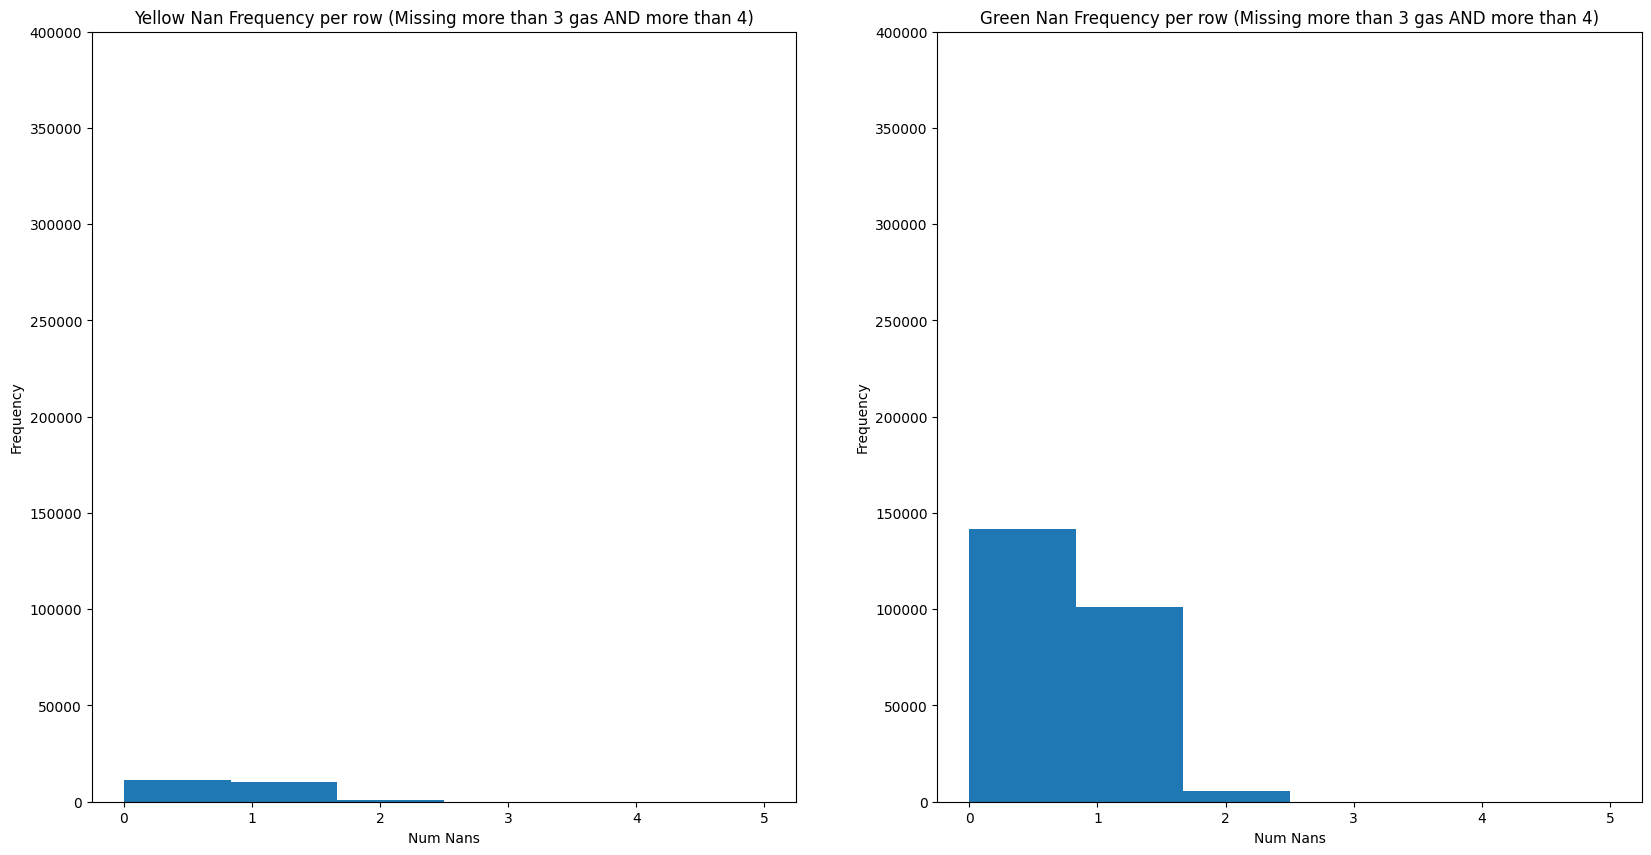

In [ ]:
filtered_yellow_df = filtered_df[filtered_df["Follow Up Priority"] == "Yellow"]
filtered_green_df = filtered_df[filtered_df["Follow Up Priority"] == "Green"]

# Making a histogram with number of missing per row

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].hist(filtered_yellow_df["NaN_Count_all"], bins=6)
axs[0].set_title("Yellow Nan Frequency per row (Missing more than 3 gas AND more than 4)")
axs[0].set_xlabel("Num Nans")
axs[0].set_ylabel("Frequency")
axs[0].set_ylim([0, 5])
axs[0].set_ylim([0, 400000])

axs[1].hist(filtered_green_df["NaN_Count_all"], bins=6)
axs[1].set_title("Green Nan Frequency per row (Missing more than 3 gas AND more than 4)")
axs[1].set_xlabel("Num Nans")
axs[1].set_ylabel("Frequency")
axs[1].set_ylim([0, 5])
axs[1].set_ylim([0, 400000])
print("Yellow df", len(yellow_df))
print("Green df", len(green_df))

# Percent of values split between yellow/green rows

In [ ]:
merged_df

,level_0,index,Timestamp (US/Eastern),CH4 (%),CO2 (%),O2 (%),Bal. Gas (%),LFG Flow (SCFM),LFG Temperature (F),Applied Vacuum - PA (in. H2O),Available Vacuum - PB (in. H2O),Static Pressure - PS (in. H2O),Valve Position (%),Liquid Column (feet),Well,day,Follow Up Priority
0,568,7580,2022-12-26 07:02:50,57.3,39.9,0.3,2.5,55.4,85.8,-6.3,-5.8,NaN,74.9,NaN,TCLC-412,2022-12-26,Yellow
1,569,7581,2022-12-28 11:18:09,57.8,41.0,0.2,1.1,69.5,89.9,-10.2,-14.0,NaN,74.9,NaN,TCLC-412,2022-12-28,Yellow
2,570,7582,2022-12-28 14:23:31,58.0,41.1,0.1,0.8,67.9,89.4,-9.7,-14.2,NaN,73.7,NaN,TCLC-412,2022-12-28,Yellow
3,571,7583,2022-12-28 17:32:20,58.0,41.2,0.0,0.8,69.4,88.8,-10.0,-14.3,NaN,74.5,NaN,TCLC-412,2022-12-28,Yellow
4,572,7584,2022-12-28 20:48:17,55.0,39.2,0.3,5.4,70.0,88.5,-10.5,-13.4,NaN,75.3,NaN,TCLC-412,2022-12-28,Yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744033,1186320,1193332,2024-08-31 20:49:19,52.1,43.4,0.0,4.6,NaN,75.9,-4.2,-14.2,NaN,19.1,12.7,TCGW-001,2024-08-31,Green
744034,1186321,1193333,2024-08-31 21:09:58,NaN,NaN,NaN,NaN,NaN,76.0,-4.6,-14.3,NaN,18.0,NaN,TCGW-001,2024-08-31,Green
744035,1186322,1193334,2024-08-31 22:06:49,NaN,NaN,NaN,NaN,NaN,76.7,-5.0,-14.3,NaN,18.0,NaN,TCGW-001,2024-08-31,Green
744036,1186323,1193335,2024-08-31 23:03:48,NaN,NaN,NaN,NaN,NaN,75.4,-5.0,-14.1,NaN,18.0,NaN,TCGW-001,2024-08-31,Green


In [ ]:
def priority_split(df, subset):
  """
  df: df
  subset, string: "Yellow" or "Green"
  """
  # THIS IS FOR YELLOW
  subset_df = df[df["Follow Up Priority"] == subset]

  nan_indices_ch4 = set(subset_df[subset_df["CH4 (%)"].isna()].index)
  nan_indices_co2 = set(subset_df[subset_df["CO2 (%)"].isna()].index)
  nan_indices_o2 = set(subset_df[subset_df["O2 (%)"].isna()].index)
  nan_indices_bal = set(subset_df[subset_df["Bal. Gas (%)"].isna()].index)
  nan_indices_lfg = set(subset_df[subset_df["LFG Flow (SCFM)"].isna()].index)
  nan_indices_temp = set(subset_df[subset_df["LFG Temperature (F)"].isna()].index)
  nan_indices_pb = set(subset_df[subset_df["Available Vacuum - PB (in. H2O)"].isna()].index)
  nan_indices_pa = set(subset_df[subset_df["Applied Vacuum - PA (in. H2O)"].isna()].index)
  nan_indices_liquid = set(subset_df[subset_df["Liquid Column (feet)"].isna()].index)
  # Find the intersection
  nan_gas = [nan_indices_ch4, nan_indices_co2, nan_indices_o2, nan_indices_bal]
  nan_select = [nan_indices_ch4, nan_indices_co2, nan_indices_o2, nan_indices_bal, nan_indices_pa, nan_indices_pb, nan_indices_liquid, nan_indices_lfg, nan_indices_temp]

  intersection_gas = find_intersection(nan_gas)
  intersection_select = find_intersection(nan_select)

  union_gas = find_union(nan_gas)
  union_select = find_union(nan_select)

  print(len(union_gas))
  print(len(union_select))
  print(len(subset_df))
  print("PERCENT NAN", subset, "CH4", round(len(nan_indices_ch4)/len(subset_df), 5))
  print("PERCENT NAN", subset, "CO2", round(len(nan_indices_co2)/len(subset_df), 5))
  print("PERCENT NAN", subset, "O2", round(len(nan_indices_o2)/len(subset_df), 5))
  print("PERCENT NAN", subset, "BAL", round(len(nan_indices_bal)/len(subset_df), 5))
  print("PERCENT NAN", subset, "LFG Flow", round(len(nan_indices_lfg)/len(subset_df), 5))
  print("PERCENT NAN", subset, "LFG Temp", round(len(nan_indices_temp)/len(subset_df), 5))
  print("PERCENT NAN", subset, "PB", round(len(nan_indices_pb)/len(subset_df), 5))
  print("PERCENT NAN", subset, "PA", round(len(nan_indices_pa)/len(subset_df), 5))
  print("PERCENT NAN", subset, "Liquid", round(len(nan_indices_liquid)/len(subset_df), 5))
  print("PERCENT", subset, "NAN GAS", round(len(union_gas)/len(subset_df), 5))
  print("PERCENT", subset, "NAN", round(len(union_select)/len(subset_df), 5))


In [ ]:
# THIS IS FOR YELLOW
yellow_df = merged_df[merged_df["Follow Up Priority"] == "Yellow"]
priority_split(merged_df, "Yellow")

86694
98208
109465
PERCENT NAN Yellow CH4 0.79109
PERCENT NAN Yellow CO2 0.79181
PERCENT NAN Yellow O2 0.79092
PERCENT NAN Yellow BAL 0.79198
PERCENT NAN Yellow LFG Flow 0.16451
PERCENT NAN Yellow LFG Temp 0.0
PERCENT NAN Yellow PB 0.01158
PERCENT NAN Yellow PA 0.00687
PERCENT NAN Yellow Liquid 0.80059
PERCENT Yellow NAN GAS 0.79198
PERCENT Yellow NAN 0.89716


In [ ]:
# count the number of missing values per row.
yellow_df.loc[:,'NaN_Count'] = yellow_df[['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. Gas (%)', "LFG Flow (SCFM)", "LFG Temperature (F)", 'Applied Vacuum - PA (in. H2O)', 'Available Vacuum - PB (in. H2O)', 'Liquid Column (feet)']].isna().sum(axis=1) # static always NaN
yellow_df

,level_0,index,Timestamp (US/Eastern),CH4 (%),CO2 (%),O2 (%),Bal. Gas (%),LFG Flow (SCFM),LFG Temperature (F),Applied Vacuum - PA (in. H2O),Available Vacuum - PB (in. H2O),Static Pressure - PS (in. H2O),Valve Position (%),Liquid Column (feet),Well,day,Follow Up Priority,NaN_Count
0,568,7580,2022-12-26 07:02:50,57.3,39.9,0.3,2.5,55.4,85.8,-6.3,-5.8,NaN,74.9,NaN,TCLC-412,2022-12-26,Yellow,1
1,569,7581,2022-12-28 11:18:09,57.8,41.0,0.2,1.1,69.5,89.9,-10.2,-14.0,NaN,74.9,NaN,TCLC-412,2022-12-28,Yellow,1
2,570,7582,2022-12-28 14:23:31,58.0,41.1,0.1,0.8,67.9,89.4,-9.7,-14.2,NaN,73.7,NaN,TCLC-412,2022-12-28,Yellow,1
3,571,7583,2022-12-28 17:32:20,58.0,41.2,0.0,0.8,69.4,88.8,-10.0,-14.3,NaN,74.5,NaN,TCLC-412,2022-12-28,Yellow,1
4,572,7584,2022-12-28 20:48:17,55.0,39.2,0.3,5.4,70.0,88.5,-10.5,-13.4,NaN,75.3,NaN,TCLC-412,2022-12-28,Yellow,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109460,1186064,1193076,2024-08-23 20:43:29,NaN,NaN,NaN,NaN,0.0,72.7,-2.1,-12.8,NaN,17.3,NaN,TCGW-001,2024-08-23,Yellow,5
109461,1186065,1193077,2024-08-23 21:40:23,NaN,NaN,NaN,NaN,0.0,68.8,-2.2,-12.4,NaN,17.3,NaN,TCGW-001,2024-08-23,Yellow,5
109462,1186066,1193078,2024-08-23 22:38:04,NaN,NaN,NaN,NaN,0.0,66.9,-2.3,-12.2,NaN,17.3,NaN,TCGW-001,2024-08-23,Yellow,5
109463,1186067,1193079,2024-08-23 23:36:32,52.2,44.2,0.0,3.6,NaN,65.3,-2.2,-12.0,NaN,17.3,12.4,TCGW-001,2024-08-23,Yellow,1


In [ ]:
# THIS IS FOR GREEN
green_df = merged_df[merged_df["Follow Up Priority"] == "Green"]
priority_split(merged_df, "Green")

386840
493107
634573
PERCENT NAN Green CH4 0.60958
PERCENT NAN Green CO2 0.6094
PERCENT NAN Green O2 0.6094
PERCENT NAN Green BAL 0.60961
PERCENT NAN Green LFG Flow 0.08729
PERCENT NAN Green LFG Temp 0.0
PERCENT NAN Green PB 0.00192
PERCENT NAN Green PA 0.00058
PERCENT NAN Green Liquid 0.63032
PERCENT Green NAN GAS 0.60961
PERCENT Green NAN 0.77707


In [ ]:
green_df.loc[:,'NaN_Count'] = green_df[['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. Gas (%)', 'LFG Flow (SCFM)', 'Applied Vacuum - PA (in. H2O)', 'Available Vacuum - PB (in. H2O)', 'Liquid Column (feet)']].isna().sum(axis=1)
green_df



,level_0,index,Timestamp (US/Eastern),CH4 (%),CO2 (%),O2 (%),Bal. Gas (%),LFG Flow (SCFM),LFG Temperature (F),Applied Vacuum - PA (in. H2O),Available Vacuum - PB (in. H2O),Static Pressure - PS (in. H2O),Valve Position (%),Liquid Column (feet),Well,day,Follow Up Priority,NaN_Count
109465,0,7012,2022-09-24 14:05:17,57.6,42.3,0.0,0.1,61.4,96.1,-8.2,-12.9,NaN,71.0,NaN,TCLC-412,2022-09-24,Green,1
109466,1,7013,2022-09-24 17:00:14,57.7,42.5,0.0,0.0,60.2,96.2,-8.0,-14.0,NaN,71.8,NaN,TCLC-412,2022-09-24,Green,1
109467,2,7014,2022-09-24 19:57:44,58.1,42.8,0.0,0.0,61.7,94.9,-8.3,-13.6,NaN,71.0,NaN,TCLC-412,2022-09-24,Green,1
109468,3,7015,2022-09-24 23:01:15,58.5,43.1,0.0,0.0,61.9,94.7,-8.3,-12.8,NaN,70.2,NaN,TCLC-412,2022-09-24,Green,1
109469,4,7016,2022-09-25 04:26:45,58.7,42.9,0.0,0.0,62.2,94.0,-8.4,-11.4,NaN,69.4,NaN,TCLC-412,2022-09-25,Green,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744033,1186320,1193332,2024-08-31 20:49:19,52.1,43.4,0.0,4.6,NaN,75.9,-4.2,-14.2,NaN,19.1,12.7,TCGW-001,2024-08-31,Green,1
744034,1186321,1193333,2024-08-31 21:09:58,NaN,NaN,NaN,NaN,NaN,76.0,-4.6,-14.3,NaN,18.0,NaN,TCGW-001,2024-08-31,Green,6
744035,1186322,1193334,2024-08-31 22:06:49,NaN,NaN,NaN,NaN,NaN,76.7,-5.0,-14.3,NaN,18.0,NaN,TCGW-001,2024-08-31,Green,6
744036,1186323,1193335,2024-08-31 23:03:48,NaN,NaN,NaN,NaN,NaN,75.4,-5.0,-14.1,NaN,18.0,NaN,TCGW-001,2024-08-31,Green,6


In [ ]:
# count the number of missing values per row.
yellow_df.loc[:,'NaN_Count'] = yellow_df[['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. Gas (%)']].isna().sum(axis=1) # static always NaN
yellow_df

print("Total rows", len(yellow_df))
print("Num 0 missing val gas", len(yellow_df[yellow_df["NaN_Count"] == 0]))
print("Num 1 missing val gas", len(yellow_df[yellow_df["NaN_Count"] == 1]))
print("Num 2 missing val gas", len(yellow_df[yellow_df["NaN_Count"] == 2]))
print("Num 3 missing val gas", len(yellow_df[yellow_df["NaN_Count"] == 3]))
print("Num 4 missing val gas", len(yellow_df[yellow_df["NaN_Count"] == 4]))

Total rows 109465
Num 0 missing val gas 22771
Num 1 missing val gas 0
Num 2 missing val gas 113
Num 3 missing val gas 5
Num 4 missing val gas 86576


In [ ]:
# count the number of missing values per row.
green_df.loc[:,'NaN_Count'] = green_df[['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. Gas (%)']].isna().sum(axis=1) # static always NaN

print("Total rows", len(green_df))
print("Num 0 missing val gas", len(green_df[green_df["NaN_Count"] == 0]))
print("Num 1 missing val gas", len(green_df[green_df["NaN_Count"] == 1]))
print("Num 2 missing val gas", len(green_df[green_df["NaN_Count"] == 2]))
print("Num 3 missing val gas", len(green_df[green_df["NaN_Count"] == 3]))
print("Num 4 missing val gas", len(green_df[green_df["NaN_Count"] == 4]))

Total rows 634573
Num 0 missing val gas 247733
Num 1 missing val gas 0
Num 2 missing val gas 138
Num 3 missing val gas 2
Num 4 missing val gas 386700


Make a histogram with number of missing items per row

Yellow df 109465
Green df 634573


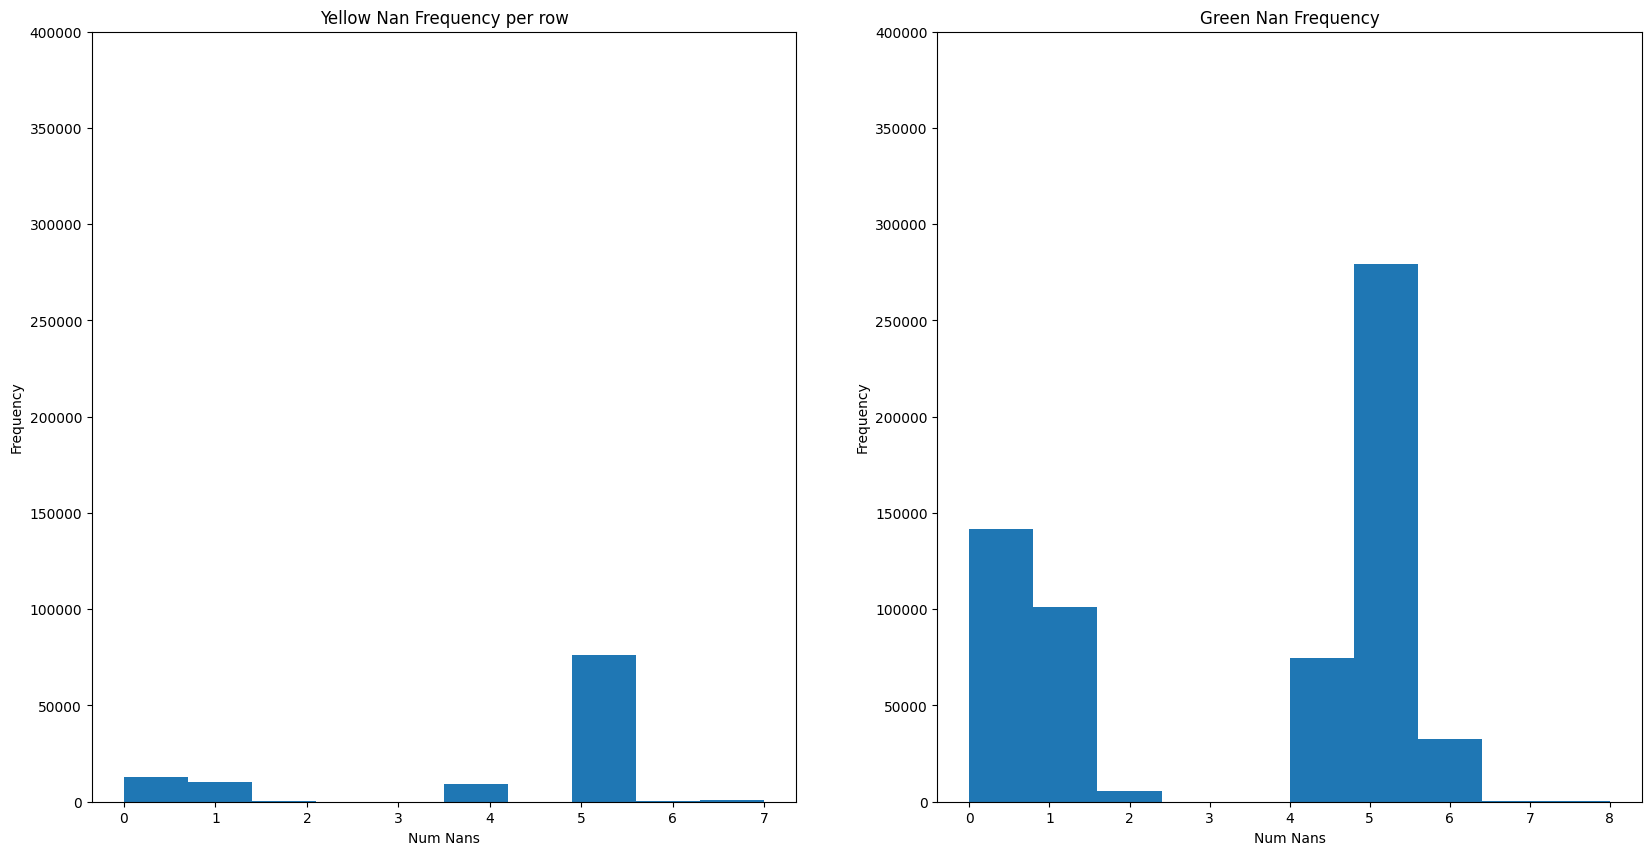

In [ ]:

# Making a histogram with number of missing per row

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].hist(yellow_df["NaN_Count"], bins=10)
axs[0].set_title("Yellow Nan Frequency per row")
axs[0].set_xlabel("Num Nans")
axs[0].set_ylabel("Frequency")
axs[0].set_ylim([0, 400000])

axs[1].hist(green_df["NaN_Count"], bins=10)
axs[1].set_title("Green Nan Frequency")
axs[1].set_xlabel("Num Nans")
axs[1].set_ylabel("Frequency")
axs[1].set_ylim([0, 400000])
print("Yellow df", len(yellow_df))
print("Green df", len(green_df))

(0.0, 1.0)

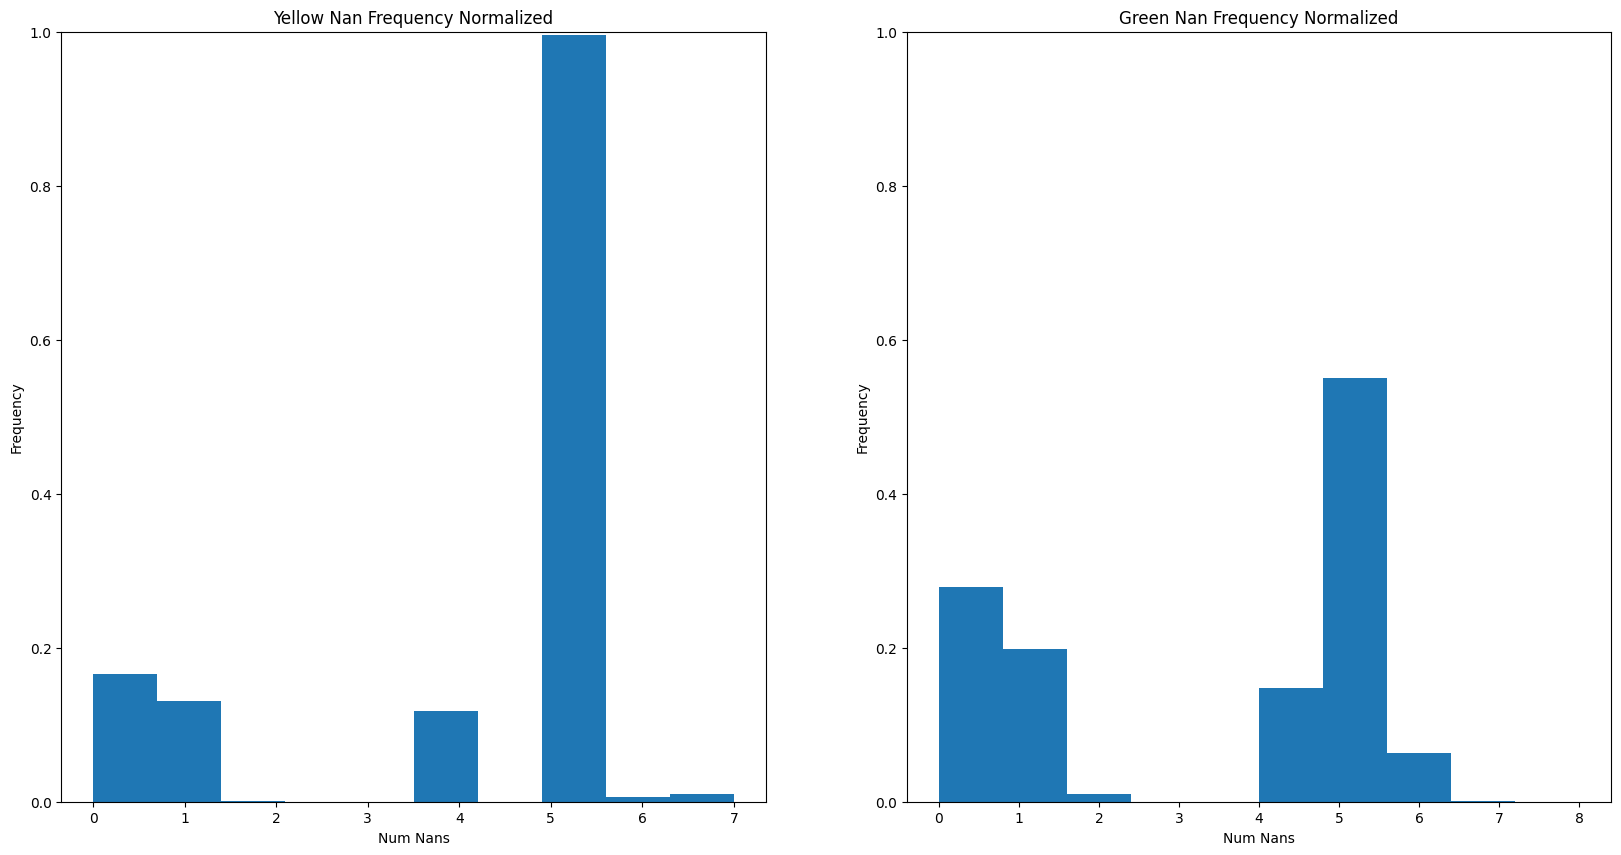

In [ ]:

# Making a histogram with number of missing per row

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].hist(yellow_df["NaN_Count"],density=True)
axs[0].set_title("Yellow Nan Frequency Normalized")
axs[0].set_xlabel("Num Nans")
axs[0].set_ylabel("Frequency")
axs[0].set_ylim([0,1])

axs[1].hist(green_df["NaN_Count"], density=True)
axs[1].set_title("Green Nan Frequency Normalized")
axs[1].set_xlabel("Num Nans")
axs[1].set_ylabel("Frequency")
axs[1].set_ylim([0,1])


In [ ]:
nan_indices_ch4 = set(merged_df[merged_df["CH4 (%)"].isna()].index)
nan_indices_co2 = set(merged_df[merged_df["CO2 (%)"].isna()].index)
nan_indices_o2 = set(merged_df[merged_df["O2 (%)"].isna()].index)
nan_indices_bal = set(merged_df[merged_df["Bal. Gas (%)"].isna()].index)
nan_indices_lfg = set(merged_df[merged_df["LFG Flow (SCFM)"].isna()].index)
nan_indices_temp = set(merged_df[merged_df["LFG Temperature (F)"].isna()].index)
nan_indices_pb = set(merged_df[merged_df["Available Vacuum - PB (in. H2O)"].isna()].index)
nan_indices_pa = set(merged_df[merged_df["Applied Vacuum - PA (in. H2O)"].isna()].index)
nan_indices_liquid = set(merged_df[merged_df["Liquid Column (feet)"].isna()].index)

# Find the intersection
nan_gas = [nan_indices_ch4, nan_indices_co2, nan_indices_o2, nan_indices_bal]
nan_select = [nan_indices_ch4, nan_indices_co2, nan_indices_o2, nan_indices_bal, nan_indices_pa, nan_indices_pb, nan_indices_liquid, nan_indices_temp, nan_indices_lfg]

intersection_gas = find_intersection(nan_gas)
intersection_select = find_intersection(nan_select)

union_gas = find_union(nan_gas)
union_select = find_union(nan_select)

print(len(union_gas))
print(len(union_select))
print(len(merged_df))
print("PERCENT NAN CH4", round(len(nan_indices_ch4)/len(merged_df), 5))
print("PERCENT NAN CO2", round(len(nan_indices_co2)/len(merged_df), 5))
print("PERCENT NAN O2", round(len(nan_indices_o2)/len(merged_df), 5))
print("PERCENT NAN BAL", round(len(nan_indices_bal)/len(merged_df), 5))
print("PERCENT NAN", "LFG Flow", round(len(nan_indices_lfg)/len(merged_df), 5))
print("PERCENT NAN", "LFG Temp", round(len(nan_indices_temp)/len(merged_df), 5))
print("PERCENT NAN PB", round(len(nan_indices_pb)/len(merged_df), 5))
print("PERCENT NAN PA", round(len(nan_indices_pa)/len(merged_df), 5))
print("PERCENT NAN Liquid", round(len(nan_indices_liquid)/len(merged_df), 5))
print("PERCENT NAN GAS", round(len(union_gas)/len(merged_df), 5))
print("PERCENT NAN", round(len(union_select)/len(merged_df), 5))

473534
591315
744038
PERCENT NAN CH4 0.63628
PERCENT NAN CO2 0.63624
PERCENT NAN O2 0.63611
PERCENT NAN BAL 0.63644
PERCENT NAN LFG Flow 0.09865
PERCENT NAN LFG Temp 0.0
PERCENT NAN PB 0.00334
PERCENT NAN PA 0.00151
PERCENT NAN Liquid 0.65537
PERCENT NAN GAS 0.63644
PERCENT NAN 0.79474


# See if adjacent rows are NAN

In [ ]:
def find_adjacent_nans(input_df, shift, input):
  # input_df
  unique_wells = input_df["Well"].unique()
  column_names = input_df.columns
  adjacent_rows_df = pd.DataFrame(columns=column_names)

  for well in unique_wells:
    temp_df = input_df[input_df["Well"] == well]
    nan_mask = temp_df.isna()
    adjacent_nans = ((temp_df[input].isna() & temp_df[input].shift(shift, axis=0).isna()))
    adjacent_nans
    adjacent_rows_df.loc[len(adjacent_rows_df)] = adjacent_nans.sum() / nan_mask.sum() # proportion of nans in adj rows out of all nans
    adjacent_rows_df.loc[len(adjacent_rows_df)-1, "Well"] = well

  return adjacent_rows_df

YELLOW

<ipython-input-16-2c32269708c9>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'TCLC-412' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  adjacent_rows_df.loc[len(adjacent_rows_df)-1, "Well"] = well
<ipython-input-16-2c32269708c9>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'TCLC-412' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  adjacent_rows_df.loc[len(adjacent_rows_df)-1, "Well"] = well
<ipython-input-16-2c32269708c9>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'TCLC-412' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  adjacent_rows_df.loc[len(adjacent_rows_df)-1, "Well"] = well
<ipython-input-16-2

Text(0, 0.5, 'Frequency')

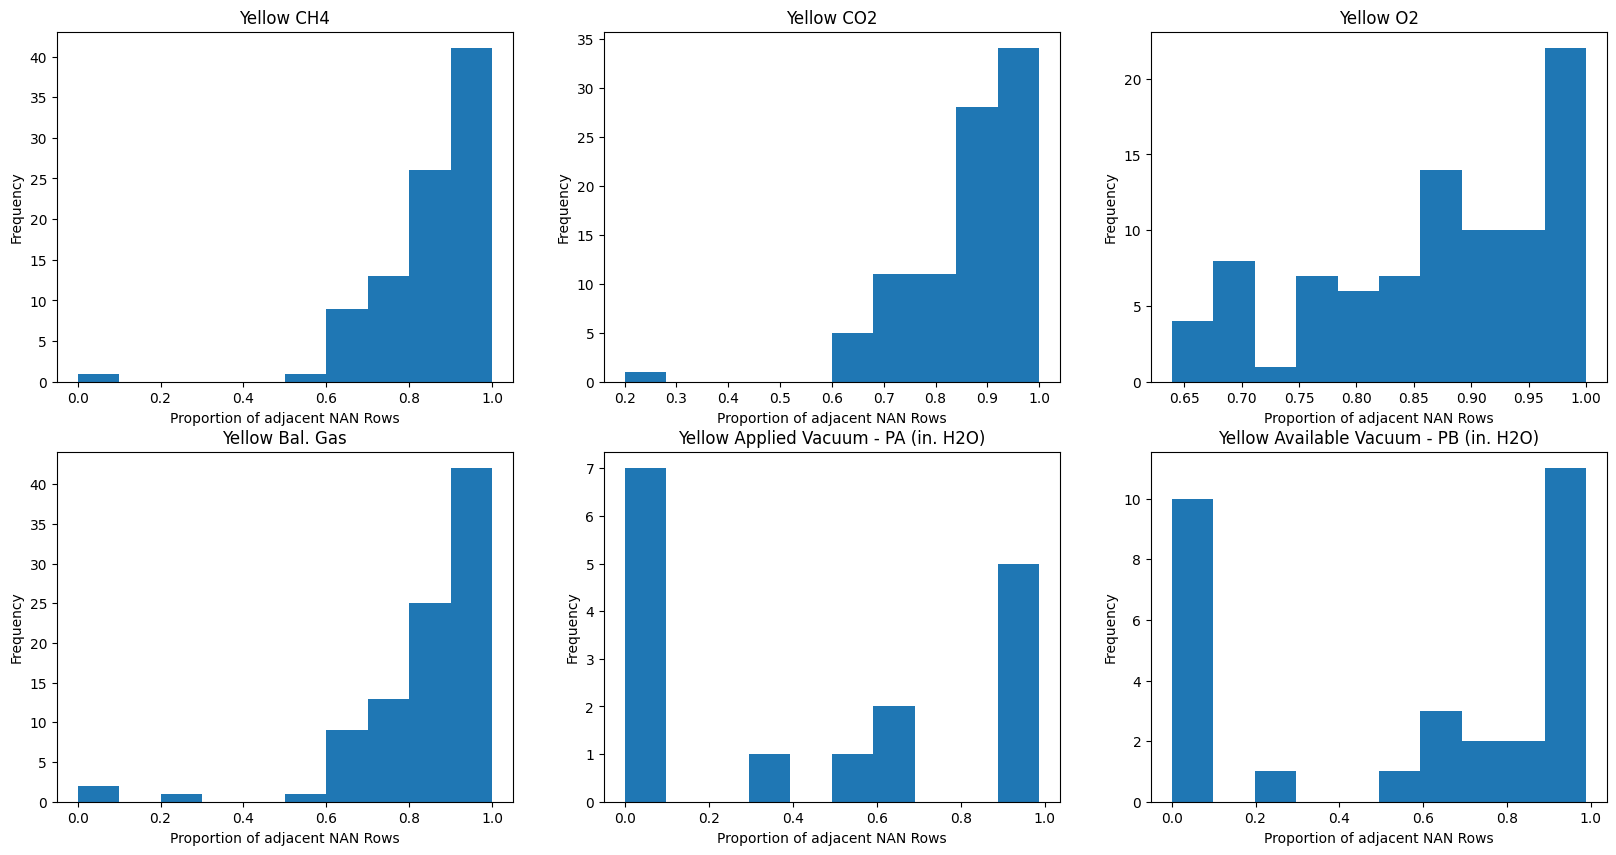

In [ ]:
# Making a histogram with different day shifts
 # proportion of nans in adj rows out of all nans

# adjacent_rows_df = find_adjacent_nans(yellow_df, -1)
# adjacent_rows_df

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs[0, 0].hist(find_adjacent_nans(yellow_df, -1, "CH4 (%)")["CH4 (%)"], bins=10)
axs[0, 0].set_title("Yellow CH4")
axs[0, 0].set_xlabel("Proportion of adjacent NAN Rows")
axs[0, 0].set_ylabel("Frequency")

axs[0, 1].hist(find_adjacent_nans(yellow_df, -1, "CO2 (%)")["CO2 (%)"], bins=10)
axs[0, 1].set_title("Yellow CO2")
axs[0, 1].set_xlabel("Proportion of adjacent NAN Rows")
axs[0, 1].set_ylabel("Frequency")

axs[0, 2].hist(find_adjacent_nans(yellow_df, -1, "O2 (%)")["O2 (%)"], bins=10)
axs[0, 2].set_title("Yellow O2")
axs[0, 2].set_xlabel("Proportion of adjacent NAN Rows")
axs[0, 2].set_ylabel("Frequency")

axs[1, 0].hist(find_adjacent_nans(yellow_df, -1, "Bal. Gas (%)")["Bal. Gas (%)"], bins=10)
axs[1, 0].set_title("Yellow Bal. Gas")
axs[1, 0].set_xlabel("Proportion of adjacent NAN Rows")
axs[1, 0].set_ylabel("Frequency")
# axs[0, 2].hist(adjacent_rows_df["CH4 (%)"], bins=10)
# axs[0, 2].set_xlabel("CH4")

# axs[1, 2].hist(adjacent_rows_df["LFG Flow (SCFM)"], bins=10)
# axs[1, 2].set_xlabel("Yellow LFG Flow (SCFM)")
# axs[1, 2].set_ylabel("Frequency")

axs[1, 1].hist(find_adjacent_nans(yellow_df, -1, "Applied Vacuum - PA (in. H2O)")["Applied Vacuum - PA (in. H2O)"], bins=10)
axs[1, 1].set_title("Yellow Applied Vacuum - PA (in. H2O)")
axs[1, 1].set_xlabel("Proportion of adjacent NAN Rows")
axs[1, 1].set_ylabel("Frequency")

axs[1, 2].hist(find_adjacent_nans(yellow_df, -1, "Available Vacuum - PB (in. H2O)")["Available Vacuum - PB (in. H2O)"], bins=10)
axs[1, 2].set_title("Yellow Available Vacuum - PB (in. H2O)")
axs[1, 2].set_xlabel("Proportion of adjacent NAN Rows")
axs[1, 2].set_ylabel("Frequency")

GREEN


In [ ]:

# adjacent_rows_df = find_adjacent_nans(green_df, -1)
adjacent_rows_df

# Making a histogram with different day shifts
 # proportion of nans in adj rows out of all nans

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs[0, 0].hist(find_adjacent_nans(green_df, -1, "CH4 (%)")["CH4 (%)"], bins=10)
axs[0, 0].set_title("Green CH4")
axs[0, 0].set_xlabel("Proportion of adjacent NAN Rows")
axs[0, 0].set_ylabel("Frequency")

axs[0, 1].hist(find_adjacent_nans(green_df, -1, "CO2 (%)")["CO2 (%)"], bins=10)
axs[0, 1].set_title("Green CO2")
axs[0, 1].set_xlabel("Proportion of adjacent NAN Rows")
axs[0, 1].set_ylabel("Frequency")

axs[0, 2].hist(find_adjacent_nans(green_df, -1, "O2 (%)")["O2 (%)"], bins=10)
axs[0, 2].set_title("Green O2")
axs[0, 2].set_xlabel("Proportion of adjacent NAN Rows")
axs[0, 2].set_ylabel("Frequency")

axs[1, 0].hist(find_adjacent_nans(green_df, -1, "Bal. Gas (%)")["Bal. Gas (%)"], bins=10)
axs[1, 0].set_title("Green Bal. Gas")
axs[1, 0].set_xlabel("Proportion of adjacent NAN Rows")
axs[1, 0].set_ylabel("Frequency")
# axs[0, 2].hist(adjacent_rows_df["CH4 (%)"], bins=10)
# axs[0, 2].set_xlabel("CH4")

# axs[1, 2].hist(adjacent_rows_df["LFG Flow (SCFM)"], bins=10)
# axs[1, 2].set_xlabel("Yellow LFG Flow (SCFM)")
# axs[1, 2].set_ylabel("Frequency")

axs[1, 1].hist(find_adjacent_nans(green_df, -1, "Applied Vacuum - PA (in. H2O)")["Applied Vacuum - PA (in. H2O)"], bins=10)
axs[1, 1].set_title("Green Applied Vacuum - PA (in. H2O)")
axs[1, 1].set_xlabel("Proportion of adjacent NAN Rows")
axs[1, 1].set_ylabel("Frequency")

axs[1, 2].hist(find_adjacent_nans(green_df, -1, "Available Vacuum - PB (in. H2O)")["Available Vacuum - PB (in. H2O)"], bins=10)
axs[1, 2].set_title("Green Available Vacuum - PB (in. H2O)")
axs[1, 2].set_xlabel("Proportion of adjacent NAN Rows")
axs[1, 2].set_ylabel("Frequency")

NameError: name 'adjacent_rows_df' is not defined

# Time within 6 hours

- Is each point within 6 hours of prev point?
- Do points not within 6 hours correlate to nan values?
- separate for yellow + green

YELLOW

In [ ]:
# Calculate the time difference between consecutive rows
yellow_time_df = yellow_df[['Timestamp (US/Eastern)', 'Well']].copy()
yellow_time_df['Timestamp (US/Eastern)'] = pd.to_datetime(yellow_df['Timestamp (US/Eastern)'])

not_within_6 = []
unique_wells = yellow_time_df["Well"].unique()
for well in unique_wells:
  temp_df = yellow_time_df[yellow_time_df["Well"] == well].copy()
  temp_df.loc[:, "time_diff"] = temp_df['Timestamp (US/Eastern)'].diff()

  temp_df.loc[:, 'within 6 hrs'] = temp_df['time_diff'] <= pd.Timedelta(hours=6)
  temp_df
  not_within_6.extend(temp_df[temp_df['within 6 hrs'] == False].index)


len(not_within_6) # indices of values that are not recorded every 6 hours


1645

In [ ]:
# NOW find indices of NAN values
nan_indices_ch4 = set(yellow_df[yellow_df["CH4 (%)"].isna()].index)
nan_indices_co2 = set(yellow_df[yellow_df["CO2 (%)"].isna()].index)
nan_indices_o2 = set(yellow_df[yellow_df["O2 (%)"].isna()].index)
nan_indices_bal = set(yellow_df[yellow_df["Bal. Gas (%)"].isna()].index)
nan_indices_lfg = set(yellow_df[yellow_df["LFG Flow (SCFM)"].isna()].index)
nan_indices_temp = set(yellow_df[yellow_df["LFG Temperature (F)"].isna()].index)
nan_indices_pb = set(yellow_df[yellow_df["Available Vacuum - PB (in. H2O)"].isna()].index)
nan_indices_pa = set(yellow_df[yellow_df["Applied Vacuum - PA (in. H2O)"].isna()].index)
nan_indices_liquid = set(yellow_df[yellow_df["Liquid Column (feet)"].isna()].index)

# Find the union
intersect_ch4 = find_intersection([nan_indices_ch4, not_within_6])
intersect_co2 = find_intersection([nan_indices_co2, not_within_6])
intersect_o2 = find_intersection([nan_indices_o2, not_within_6])
intersect_lfg = find_intersection([nan_indices_lfg, not_within_6])
intersect_temp = find_intersection([nan_indices_temp, not_within_6])
intersect_bal = find_intersection([nan_indices_bal, not_within_6])
intersect_pa = find_intersection([nan_indices_pa, not_within_6])
intersect_pb = find_intersection([nan_indices_pb, not_within_6])
intersect_liquid = find_intersection([nan_indices_liquid, not_within_6])

gas_hours = set(intersect_ch4 + intersect_co2 + intersect_o2 + intersect_bal)
print("Length of gas nans: ", len(set(nan_indices_ch4 | nan_indices_co2 | nan_indices_o2 | nan_indices_bal)))
print("Length of not within 6 hours:", len(not_within_6))
print("Length of overlap between gas nans + not within 6 hours:", len(gas_hours))
print("Length of yellow", len(yellow_df))
print("NOTE: this shd be minus abt 100 values since I'm not accounting for the jump in hours between wells \n")


select_hours = set(intersect_ch4 + intersect_co2 + intersect_o2 + intersect_bal + intersect_pa + intersect_pb + intersect_liquid + intersect_lfg + intersect_temp)
print("Length of select nans: ", len(set(nan_indices_ch4 | nan_indices_co2 | nan_indices_o2 | nan_indices_bal | nan_indices_pa | nan_indices_pb | nan_indices_liquid | nan_indices_lfg | nan_indices_temp)))
print("Length of not within 6 hours:", len(not_within_6))
print("Length of overlap between select nans + not within 6 hours:", len(select_hours))
print("Length of yellow", len(yellow_df))
print("NOTE: this shd be minus abt 100 values since I'm not accounting for the jump in hours between wells")

Length of gas nans:  86694
Length of not within 6 hours: 1645
Length of overlap between gas nans + not within 6 hours: 519
Length of yellow 109465
NOTE: this shd be minus abt 100 values since I'm not accounting for the jump in hours between wells 

Length of select nans:  98208
Length of not within 6 hours: 1645
Length of overlap between select nans + not within 6 hours: 1418
Length of yellow 109465
NOTE: this shd be minus abt 100 values since I'm not accounting for the jump in hours between wells


In [ ]:
(573 - 100) / 2296

0.20601045296167247

green

In [ ]:
# Calculate the time difference between consecutive rows
green_time_df = green_df[['Timestamp (US/Eastern)', 'Well']].copy()
green_time_df['Timestamp (US/Eastern)'] = pd.to_datetime(green_df['Timestamp (US/Eastern)'])

not_within_6 = []
unique_wells = green_time_df["Well"].unique()
for well in unique_wells:
  temp_df = green_time_df[green_time_df["Well"] == well].copy()
  temp_df.loc[:, "time_diff"] = temp_df['Timestamp (US/Eastern)'].diff()

  temp_df.loc[:, 'within 6 hrs'] = temp_df['time_diff'] <= pd.Timedelta(hours=6)
  temp_df
  not_within_6.extend(temp_df[temp_df['within 6 hrs'] == False].index)

len(not_within_6) # indices of values that are not recorded every 6 hours


2296

In [ ]:
# NOW find indices of NAN values
nan_indices_ch4 = set(green_df[green_df["CH4 (%)"].isna()].index)
nan_indices_co2 = set(green_df[green_df["CO2 (%)"].isna()].index)
nan_indices_o2 = set(green_df[green_df["O2 (%)"].isna()].index)
nan_indices_bal = set(green_df[green_df["Bal. Gas (%)"].isna()].index)
nan_indices_lfg = set(green_df[green_df["LFG Flow (SCFM)"].isna()].index)
nan_indices_temp = set(green_df[green_df["LFG Temperature (F)"].isna()].index)
nan_indices_pb = set(green_df[green_df["Available Vacuum - PB (in. H2O)"].isna()].index)
nan_indices_pa = set(green_df[green_df["Applied Vacuum - PA (in. H2O)"].isna()].index)
nan_indices_liquid = set(green_df[green_df["Liquid Column (feet)"].isna()].index)

# Find the union
intersect_ch4 = find_intersection([nan_indices_ch4, not_within_6])
intersect_co2 = find_intersection([nan_indices_co2, not_within_6])
intersect_o2 = find_intersection([nan_indices_o2, not_within_6])
intersect_bal = find_intersection([nan_indices_bal, not_within_6])
intersect_lfg = find_intersection([nan_indices_lfg, not_within_6])
intersect_temp = find_intersection([nan_indices_temp, not_within_6])
intersect_pa = find_intersection([nan_indices_pa, not_within_6])
intersect_pb = find_intersection([nan_indices_pb, not_within_6])
intersect_liquid = find_intersection([nan_indices_liquid, not_within_6])

gas_hours = set(intersect_ch4 + intersect_co2 + intersect_o2 + intersect_bal)
print("Length of gas nans: ", len(set(nan_indices_ch4 | nan_indices_co2 | nan_indices_o2 | nan_indices_bal)))
print("Length of not within 6 hours:", len(not_within_6))
print("Length of overlap between gas nans + not within 6 hours:", len(gas_hours))
print("Length of green", len(green_df))
print("NOTE: this shd be minus abt 100 values since I'm not accounting for the jump in hours between wells \n")


select_hours = set(intersect_ch4 + intersect_co2 + intersect_o2 + intersect_bal + intersect_pa + intersect_pb + intersect_liquid + intersect_lfg + intersect_temp)
print("Length of select nans: ", len(set(nan_indices_ch4 | nan_indices_co2 | nan_indices_o2 | nan_indices_bal | nan_indices_pa | nan_indices_pb | nan_indices_liquid | nan_indices_lfg | nan_indices_temp)))
print("Length of not within 6 hours:", len(not_within_6))
print("Length of overlap between select nans + not within 6 hours:", len(select_hours))
print("Length of green", len(green_df))
print("NOTE: this shd be minus abt 100 values since I'm not accounting for the jump in hours between wells")

Length of gas nans:  386840
Length of not within 6 hours: 2296
Length of overlap between gas nans + not within 6 hours: 573
Length of green 634573
NOTE: this shd be minus abt 100 values since I'm not accounting for the jump in hours between wells 

Length of select nans:  493107
Length of not within 6 hours: 2296
Length of overlap between select nans + not within 6 hours: 1892
Length of green 634573
NOTE: this shd be minus abt 100 values since I'm not accounting for the jump in hours between wells


# See within yellow frames, if NAN values are adjacent


In [ ]:
yellow_df

# # Find unique wells
# unique_wells = yellow_df["Well"].unique()
# unique_wells

# # Find nan_groups
# nan_groups = []
# consecutive_nan = pd.DataFrame({'well': [], 'col': [], 'shift': [], 'num consecutive': []})
# for well in unique_wells[1:2]:
#   well_df = yellow_df.loc[yellow_df["Well"] == well]
#   nan_mask = well_df.isna()
#   nan_mask.drop('Timestamp (US/Eastern)', axis=1, inplace=True)
#   nan_mask.drop('Well', axis=1, inplace=True)
#   nan_mask = nan_mask.reset_index(drop=True)

#   for column in nan_mask:
#     # Get the positions of NaNs in the column
#     nan_positions = nan_mask[nan_mask[column] == True].index
#     print(nan_mask)
#     # store the positions
#     nan_groups.append([well, column, nan_positions])

#     # checking for adjacent valuse
#     for j in range(1, 10): #go through 20 days
#       consecutive_nan_mask = nan_mask & nan_mask.shift(j)
#       consecutive_nan_mask = consecutive_nan_mask.loc[consecutive_nan_mask[column] == True]
#       consecutive_nan.loc[len(consecutive_nan)] = {'well': well, 'col': column, 'shift': j, 'num consecutive':len(consecutive_nan_mask) }


# nan_groups # contains indices of nan values
# consecutive_nan

In [ ]:
# Number of unique wells
unique_wells = yellow_df["Well"].unique()


null_arr = []

# For each well, get count of NR values per row
for well in unique_wells:
  well_df = yellow_df.loc[yellow_df["Well"] == well]
  result = well_df.isnull().sum()
  result = result.drop("Well")
  result = result.drop('Timestamp (US/Eastern)')
  result["Well"] = well
  result["Num Values"] = len(well_df)
  null_arr.append(result)

null_values_df = pd.DataFrame(null_arr)

# consecutive_nan_edited
null_values_df
df_repeated = null_values_df.loc[null_values_df.index.repeat(99)]
df_repeated = df_repeated.reset_index(drop=True)
df_repeated

consecutive_nan_edited = consecutive_nan.copy()
consecutive_nan_edited
consecutive_nan_edited[['num consecutive']] = consecutive_nan[['num consecutive']].div(df_repeated['Num Values'], axis=0)
consecutive_nan_edited['col'].unique()


In [ ]:

# Making a histogram with different day shifts

selected_values = consecutive_nan_edited[(consecutive_nan_edited['shift'] == 3) & (consecutive_nan_edited['col'] == 'Bal. Gas (%)')]['num consecutive']

plt.hist(selected_values, bins=10)
plt.xlabel('num consecutive')
plt.ylabel('Frequency')
plt.title('Histogram of Selected Values with shift')
plt.show()

# Percent of Yellow

In [ ]:
daily_averages_df

wells = daily_averages_df["Well"].unique()
percent_list = []
for well in wells:
  df_well = daily_averages_df.loc[daily_averages_df["Well"] == well]
  green = df_well.loc[daily_averages_df["Follow Up Priority"] == "Green"]
  yellow = df_well.loc[daily_averages_df["Follow Up Priority"] == "Yellow"]
  percent =len(yellow) / (len(yellow) + len(green))
  percent_list.append(round(percent, 3))

percent_list


In [ ]:

# Making a histogram with different day shifts

plt.hist(percent_list, bins=10)
plt.xlabel('percent yellow')
plt.ylabel('Frequency')
plt.title('Histogram of percent yellow')
plt.show()

# Check Missing Values For each well



# The next two cells find the number of null values in each column for each well

In [ ]:
# Number of unique wells
unique_wells = individual_data_df["Well"].unique()


null_arr = []

# For each well, get count of NR values per row
for well in unique_wells:
  well_df = individual_data_df.loc[individual_data_df["Well"] == well]
  result = well_df.isnull().sum()
  result = result.drop("Well")
  result = result.drop('Timestamp (US/Eastern)')
  result["Well"] = well
  result["Num Values"] = len(well_df)
  null_arr.append(result)

null_values_df = pd.DataFrame(null_arr)

In [ ]:
null_values_df

In [ ]:
null_values_df_percent = null_values_df.copy()
null_values_df_percent

In [ ]:
null_values_df_percent[['CH4 (%)']] = null_values_df_percent[['CH4 (%)']].div(null_values_df['Num Values'], axis=0)
null_values_df_percent[['CO2 (%)']] = null_values_df_percent[['CO2 (%)']].div(null_values_df['Num Values'], axis=0)
null_values_df_percent[['O2 (%)']] = null_values_df_percent[['O2 (%)']].div(null_values_df['Num Values'], axis=0)
null_values_df_percent[['Bal. Gas (%)']] = null_values_df_percent[['Bal. Gas (%)']].div(null_values_df['Num Values'], axis=0)
null_values_df_percent[['LFG Flow (SCFM)']] = null_values_df_percent[['LFG Flow (SCFM)']].div(null_values_df['Num Values'], axis=0)
null_values_df_percent[['Applied Vacuum - PA (in. H2O)']] = null_values_df_percent[['Applied Vacuum - PA (in. H2O)']].div(null_values_df['Num Values'], axis=0)
null_values_df_percent[['Available Vacuum - PB (in. H2O)']] = null_values_df_percent[['Available Vacuum - PB (in. H2O)']].div(null_values_df['Num Values'], axis=0)
null_values_df_percent[['Liquid Column (feet)']] = null_values_df_percent[['Liquid Column (feet)']].div(null_values_df['Num Values'], axis=0)


null_values_df_percent

In [ ]:
null_values_df_percent

print(null_values_df_percent[['CH4 (%)']].median())
print(null_values_df_percent[['O2 (%)']].median())
print(null_values_df_percent[['Bal. Gas (%)']].median())
print(null_values_df_percent[['LFG Flow (SCFM)']].median())
print(null_values_df_percent[['Applied Vacuum - PA (in. H2O)']].median())
print(null_values_df_percent[['Available Vacuum - PB (in. H2O)']].median())
print(null_values_df_percent[['Liquid Column (feet)']].median())


First, we find which cells are actually broken. Then we find which wells the isolation forest designates as outliers and compare the two lists.



# Check if null values tend to be concentrated in rows next to each other

For each well, check if the null values are in adjacent rows (?)

In [ ]:
individual_data_df

unique_wells = individual_data_df["Well"].unique()
unique_wells

nan_groups = []
consecutive_nan = pd.DataFrame({'well': [], 'col': [], 'shift': [], 'num consecutive': []})
for well in unique_wells:
  well_df = individual_data_df.loc[individual_data_df["Well"] == well]
  nan_mask = well_df.isna()
  nan_mask.drop('Timestamp (US/Eastern)', axis=1, inplace=True)
  nan_mask.drop('Well', axis=1, inplace=True)
  nan_mask = nan_mask.reset_index(drop=True)

  for column in nan_mask:
    # Get the positions of NaNs in the column
    nan_positions = nan_mask[nan_mask[column] == True].index

    # store the positions
    nan_groups.append([well, column, nan_positions])

    # checking for adjacent valuse
    for j in range(1, 10): #go through 20 days
      consecutive_nan_mask = nan_mask & nan_mask.shift(j)
      consecutive_nan_mask = consecutive_nan_mask.loc[consecutive_nan_mask[column] == True]
      consecutive_nan.loc[len(consecutive_nan)] = {'well': well, 'col': column, 'shift': j, 'num consecutive':len(consecutive_nan_mask) }


nan_groups # contains indices of nan values
consecutive_nan

In [ ]:
# consecutive_nan_edited
null_values_df
df_repeated = null_values_df.loc[null_values_df.index.repeat(99)]
df_repeated = df_repeated.reset_index(drop=True)
df_repeated

consecutive_nan_edited = consecutive_nan.copy()
consecutive_nan_edited
consecutive_nan_edited[['num consecutive']] = consecutive_nan[['num consecutive']].div(df_repeated['Num Values'], axis=0)
consecutive_nan_edited['col'].unique()


In [ ]:

# Making a histogram with different day shifts

selected_values = consecutive_nan_edited[(consecutive_nan_edited['shift'] == 9) & (consecutive_nan_edited['col'] == 'Bal. Gas (%)')]['num consecutive']

plt.hist(selected_values, bins=10)
plt.xlabel('num consecutive')
plt.ylabel('Frequency')
plt.title('Histogram of Selected Values with shift')
plt.show()

find the average number of consecutive values for each shfit...

In [ ]:
# print(consecutive_nan.to_string())
# (consecutive_nan["Shift"] == 1) & (consecutive_nan["Num of Consecutive"] ).mean()


shift_1 = consecutive_nan.loc[(consecutive_nan["shift"] == 1) & (consecutive_nan["col"] == "CH4 (%)")]
# shift_1.loc[shift_1["num consecutive"]]
shift_1
shift_1["num consecutive"].mean()

nan_groups


unique_shift = consecutive_nan["shift"].unique()
unique_col = consecutive_nan["col"].unique()
unique_well = consecutive_nan["well"].unique()

shift_list = []
col_list = []
well_list = []

for shift in unique_shift:
  shift_1 = consecutive_nan.loc[(consecutive_nan["shift"] == shift)]
  shift_list.append([shift, int(shift_1["num consecutive"].mean())])

for col in unique_col:
  col_1 = consecutive_nan.loc[(consecutive_nan["col"] == col)]
  col_list.append([col, int(col_1["num consecutive"].mean())])

for well in unique_well:
  well_df = individual_data_df.loc[individual_data_df["Well"] == well]
  well_1 = consecutive_nan.loc[(consecutive_nan["well"] == well)]
  well_list.append([well, (int(well_1["num consecutive"].mean()))/(len(well_df))])

shift_list
col_list
well_list

In [ ]:
shift_list

# See if Nan Values Correlate With yellow/green days

1. Get all days of yellow values for a well from the daily averages
2. Get all days of nan values fro a well from the invidivual data sheet
3. Check what percent of days overlap between the two

In [ ]:

unique_wells = individual_data_df["Well"].unique()

overlap = []
for well in unique_wells:
  broken_days_daily = find_yellow_times(daily_averages_df, well)
  broken_days_daily = sorted(list(set(broken_days_daily))) # yellow days in daily averages

  # individual data
  well_df = individual_data_df.loc[individual_data_df["Well"] == well]

  # FIXING TIMESTEP
  # Convert the 'Timestamp (US/Eastern)' column to datetime
  well_df.loc[:, 'Timestamp (US/Eastern)'] = pd.to_datetime(well_df['Timestamp (US/Eastern)'])

  # Define your date for comparison
  time1 = pd.to_datetime("2022-09-25")  # Date 1
  time2 = pd.to_datetime("2023-04-12")  # Date 1

  # Perform the searchsorted operation
  index1 = np.searchsorted(well_df['Timestamp (US/Eastern)'], time1)
  index2 = np.searchsorted(well_df['Timestamp (US/Eastern)'], time2)

  # FIXING NAN
  nan_mask = well_df.isna()
  nan_mask.drop('Timestamp (US/Eastern)', axis=1, inplace=True)
  nan_mask.drop('Well', axis=1, inplace=True)
  nan_mask.drop('Static Pressure - PS (in. H2O)', axis=1, inplace=True)
  nan_mask.drop('Liquid Column (feet)', axis=1, inplace=True)
  nan_positions = []


  i = []
  for column in nan_mask:
    i.extend(nan_mask[nan_mask[column] == True].index)

  i = list(set(i))
  nan_times = ((pd.to_datetime(well_df.loc[i, 'Timestamp (US/Eastern)']).dt)).strftime('%Y-%m-%d')
  nan_times = (set(nan_times))
  # print(sorted(nan_times))
  # print(sorted(broken_days_daily))
  # print((nan_times).intersection(broken_days_daily))
  overlap.append([len((nan_times).intersection(broken_days_daily)), len(nan_times), len(broken_days_daily), well])

overlap


In [ ]:
# # individual data
# well_df = individual_data_df.loc[individual_data_df["Well"] == well]
# well_df

# Convert the 'Timestamp (US/Eastern)' column to datetime
well_df['Timestamp (US/Eastern)'] = pd.to_datetime(well_df['Timestamp (US/Eastern)'])

# Define your date for comparison
time1 = pd.to_datetime("2022-09-25")  # Date 1
time2 = pd.to_datetime("2024-08-31")  # Date 1

# Perform the searchsorted operation
index1 = np.searchsorted(well_df['Timestamp (US/Eastern)'], time1)
index2 = np.searchsorted(well_df['Timestamp (US/Eastern)'], time2)

# Check the result (optional)
well_df = well_df.iloc[index1:index2]
well_df

In [ ]:


broken_days_daily = sorted(list(set(broken_days_daily)))
broken_days_daily

# Aggregate Individual data with green/yellow rows

In [ ]:
# for well in unique_wells:
#   broken_days_daily = find_yellow_times(daily_averages_df, well)
#   broken_days_daily = sorted(list(set(broken_days_daily))) # yellow days in daily averages
# individual_data_df

unique_wells = daily_averages_df['Well'].unique()
individual_data_color_df = individual_data_df.copy()
individual_data_color_df["Follow Up Priority"] = np.nan
individual_data_color_df["day"] = (pd.to_datetime(individual_data_color_df['Timestamp (US/Eastern)']).dt).strftime('%Y-%m-%d')

daily_averages_df["day"] = (pd.to_datetime(daily_averages_df['day']).dt).strftime('%Y-%m-%d')


# Define the custom function to look up values
def get_follow_up_priority(row):
    # Create boolean conditions for both 'day' and 'Well' comparisons
    condition_day = daily_averages_df['day'] == row['day']
    condition_well = daily_averages_df['Well'] == row['Well']

    # Combine conditions with the & operator (element-wise logical AND)
    match = daily_averages_df[condition_day & condition_well]

    # Return 'Follow Up Priority' if a match is found, otherwise None
    return match['Follow Up Priority'].iloc[0] if not match.empty else None

# Apply the function to create the new column in individual_data_color_df
individual_data_color_df['Follow Up Priority'] = individual_data_color_df.apply(get_follow_up_priority, axis=1)

# Display the updated dataframe
individual_data_color_df

# Check Well Type vs. NaN Values

In [ ]:
# Check for null value trends by well type

# aggregate data for different types of wells -- LC, GW, Header

unique_wells = daily_averages_df["Well"].unique()
h = "Header"
lc = "TCLC"
gw = "TCGW"

header_averages_list = []
lc_averages_list = []
gw_averages_list = []

for well in unique_wells:
    well_df = daily_averages_df.loc[daily_averages_df["Well"] == well]
    if h in well:
        header_averages_list.append(well_df)
    if lc in well:
        lc_averages_list.append(well_df)
    if gw in well:
        gw_averages_list.append(well_df)

header_averages_df = pd.concat(header_averages_list, ignore_index=True)
lc_averages_df = pd.concat(lc_averages_list, ignore_index=True)
gw_averages_df = pd.concat(gw_averages_list, ignore_index=True)

In [ ]:
lc_averages_df

Header Wells

<Figure size 640x480 with 0 Axes>

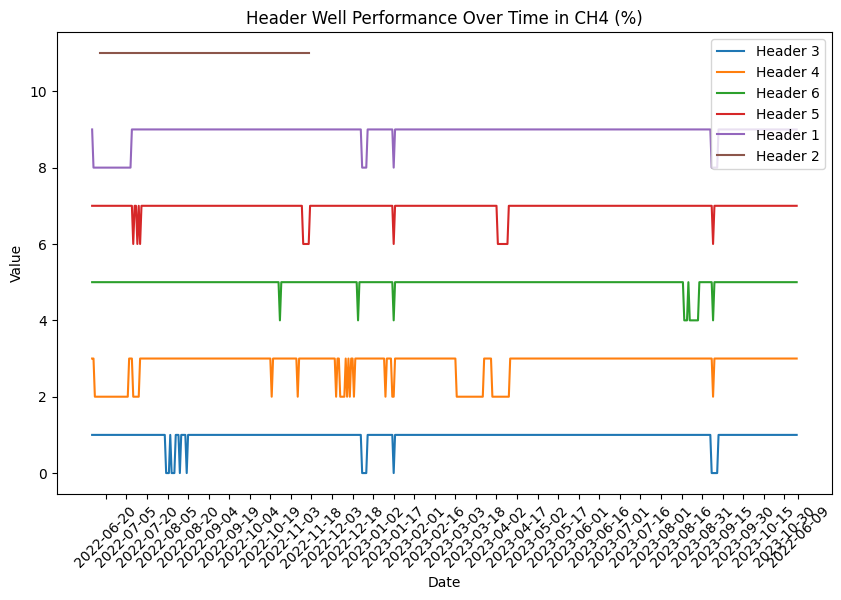

In [ ]:
# plot NR over time? for different parameters
param = "CH4 (%)" # change based on what you are looking at
#header_averages_df
Hwells = header_averages_df["Well"].unique()

#remove wells that don't seem to provide any data
wells_to_remove = {"N. Header", "S. Header", "NE Header", "E Header", "401 Header"}
Hwells = [element for element in Hwells if element not in wells_to_remove]
# loop thru for every header
desired_valsH_df = header_averages_df.loc[:, [param]]
days = header_averages_df["day"]
bin_df = desired_valsH_df.notna().astype(int) # turn NaN into 0 and actual values into 1
binary_h_df = pd.merge(bin_df, header_averages_df["day"], left_index=True, right_index=True)
binary_h_df = pd.merge(binary_h_df, header_averages_df["Well"], left_index=True, right_index=True)

# now we have all the headers for every day in one LONG df

#plot
start = 0
end = 0
offset = 0
plt.clf()
plt.figure(figsize=(10, 6))
for wells in Hwells:
  #reconfigure dataframe for current well
  group_df = binary_h_df[binary_h_df['Well'] == wells]

  group_df = group_df.sort_values(by='day')  # Sort by day

  # Plot the section
  plt.plot(group_df['day'], group_df[param]  + offset, label=f'{wells}')
  offset += 2

# label x every 10 days to clean up chart
sub_df = header_averages_df.iloc[0: header_averages_df['Well'].value_counts().get(Hwells[3], 0)]
xticks = sub_df['day'][::15]
plt.xticks(ticks=xticks, labels=xticks)
plt.xticks(rotation= 45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'Header Well Performance Over Time in {param}')
plt.legend()
plt.grid(False)
plt.show()


# binary_h_df

LC-- Leachate Wells

<Figure size 640x480 with 0 Axes>

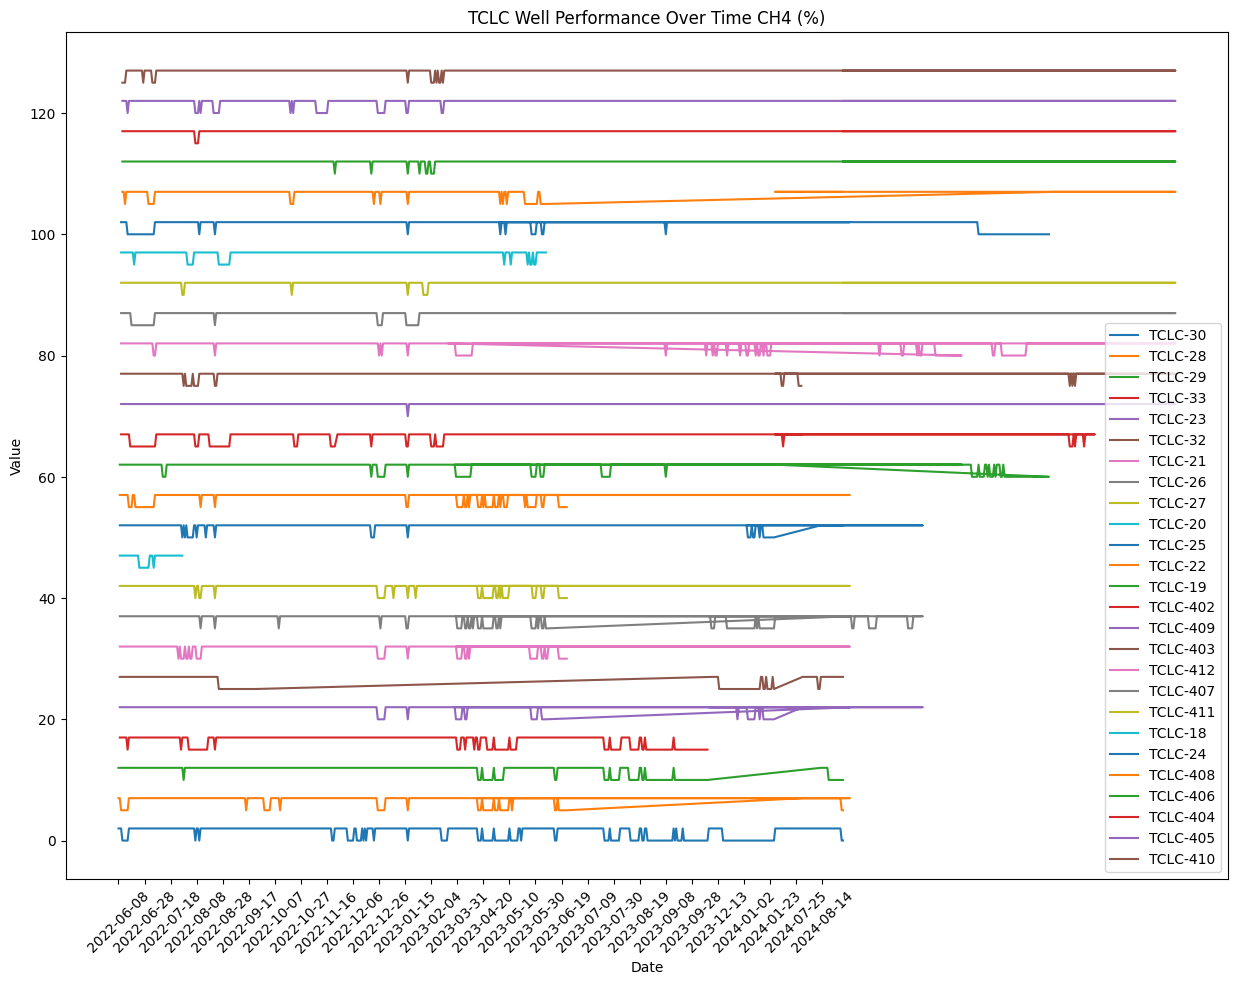

In [ ]:
#lc_averages_df
LCwells = lc_averages_df["Well"].unique()
midlength = round(len(LCwells)/2)
LCwells1 = LCwells[:midlength]
LCwells2 = LCwells[midlength:]
# loop thru for every header
desired_valsLC_df = lc_averages_df.loc[:, [param]]
days = lc_averages_df["day"]
bin_df = desired_valsLC_df.notna().astype(int) # turn NaN into 0 and actual values into 1
binary_lc_df = pd.merge(bin_df, lc_averages_df["day"], left_index=True, right_index=True)
binary_lc_df = pd.merge(binary_lc_df, lc_averages_df["Well"], left_index=True, right_index=True)

# now we have all the well data for every day in one LONG df



#plot
offset = 0
plt.clf()
plt.figure(figsize=(15, 11))
for wells in LCwells1:
  #reconfigure dataframe for current well
  group_df = binary_lc_df[binary_lc_df['Well'] == wells]

  group_df = group_df.sort_values(by='day')  # Sort by day

  # Plot the section
  plt.plot(group_df['day'], group_df[param] * 2 + offset, label=f'{wells}')
  offset += 5


# label x every 10 days to clean up chart
sub_df = lc_averages_df.iloc[0: lc_averages_df['Well'].value_counts().get(LCwells[0], 0)]
xticks = sub_df['day'][::20]
plt.xticks(ticks=xticks, labels=xticks)
plt.xticks(rotation=45)
# I don't know why the ticks are messed up

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'TCLC Well Performance Over Time {param}')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
binary_lc_df

,CH4 (%),day,Well
0,1,2022-06-08,TCLC-30
1,1,2022-06-09,TCLC-30
2,1,2022-06-10,TCLC-30
3,0,2022-06-11,TCLC-30
4,0,2022-06-12,TCLC-30
...,...,...,...
11928,0,2023-10-06,TCLC-15
11929,1,2023-10-07,TCLC-15
11930,1,2023-10-08,TCLC-15
11931,1,2023-10-09,TCLC-15


<Figure size 640x480 with 0 Axes>

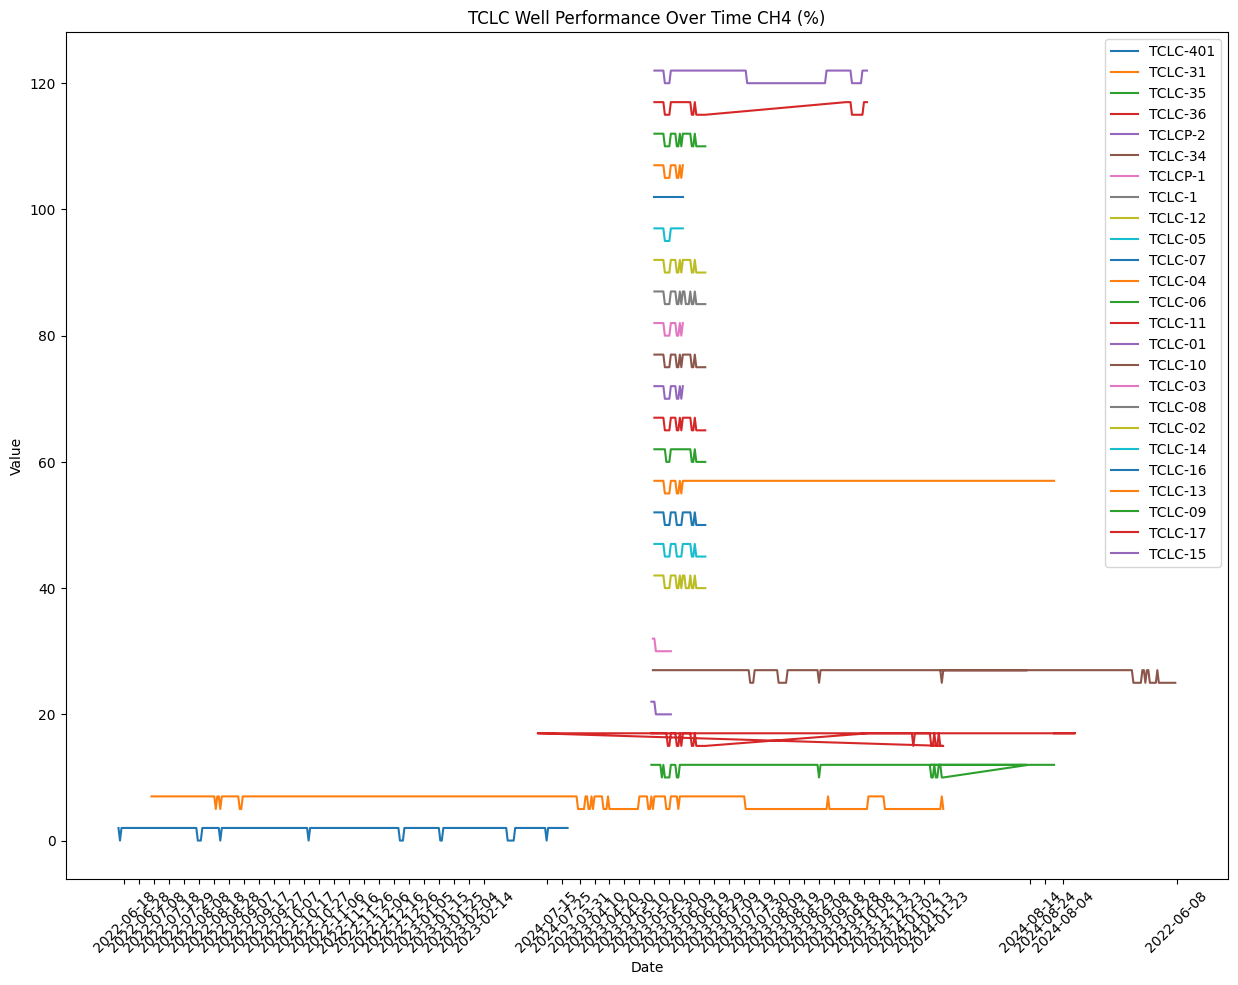

In [ ]:
offset = 0
plt.clf()
plt.figure(figsize=(15, 11))
for wells in LCwells2:
  #reconfigure dataframe for current well
  group_df = binary_lc_df[binary_lc_df['Well'] == wells]

  group_df = group_df.sort_values(by='day')  # Sort by day

  # Plot the section
  plt.plot(group_df['day'], group_df[param] * 2 + offset, label=f'{wells}')
  offset += 5


# label x every 10 days to clean up chart
sub_df = lc_averages_df.iloc[0: lc_averages_df['Well'].value_counts().get(LCwells[0], 0)]
xticks = sub_df['day'][::10]
plt.xticks(ticks=xticks, labels=xticks)
plt.xticks(rotation=45)
# I don't know why the ticks are messed up

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'TCLC Well Performance Over Time {param}')
plt.legend()
plt.grid(False)
plt.show()


GW-- Gas Wells

In [ ]:
standardized_GWwells


{'TCGW-1',
 'TCGW-10',
 'TCGW-100',
 'TCGW-101',
 'TCGW-102',
 'TCGW-103',
 'TCGW-104',
 'TCGW-105',
 'TCGW-106',
 'TCGW-107',
 'TCGW-108',
 'TCGW-109',
 'TCGW-11',
 'TCGW-110',
 'TCGW-111',
 'TCGW-112',
 'TCGW-113',
 'TCGW-114',
 'TCGW-12',
 'TCGW-13',
 'TCGW-14',
 'TCGW-15',
 'TCGW-16A',
 'TCGW-17',
 'TCGW-17A',
 'TCGW-18',
 'TCGW-19',
 'TCGW-2',
 'TCGW-20',
 'TCGW-200',
 'TCGW-201',
 'TCGW-202',
 'TCGW-203',
 'TCGW-204',
 'TCGW-205',
 'TCGW-206',
 'TCGW-21',
 'TCGW-22',
 'TCGW-23',
 'TCGW-24',
 'TCGW-25A',
 'TCGW-26A',
 'TCGW-27',
 'TCGW-28',
 'TCGW-28A',
 'TCGW-29',
 'TCGW-29A',
 'TCGW-3',
 'TCGW-30A',
 'TCGW-31',
 'TCGW-32',
 'TCGW-33',
 'TCGW-34A',
 'TCGW-35',
 'TCGW-36',
 'TCGW-37',
 'TCGW-37A',
 'TCGW-38',
 'TCGW-39',
 'TCGW-4',
 'TCGW-40',
 'TCGW-41',
 'TCGW-42',
 'TCGW-42A',
 'TCGW-43',
 'TCGW-44',
 'TCGW-44A',
 'TCGW-45',
 'TCGW-46',
 'TCGW-47',
 'TCGW-48',
 'TCGW-49',
 'TCGW-49A',
 'TCGW-50',
 'TCGW-51',
 'TCGW-52A',
 'TCGW-52B',
 'TCGW-53A',
 'TCGW-54',
 'TCGW-55',
 'TCGW-

<Figure size 640x480 with 0 Axes>

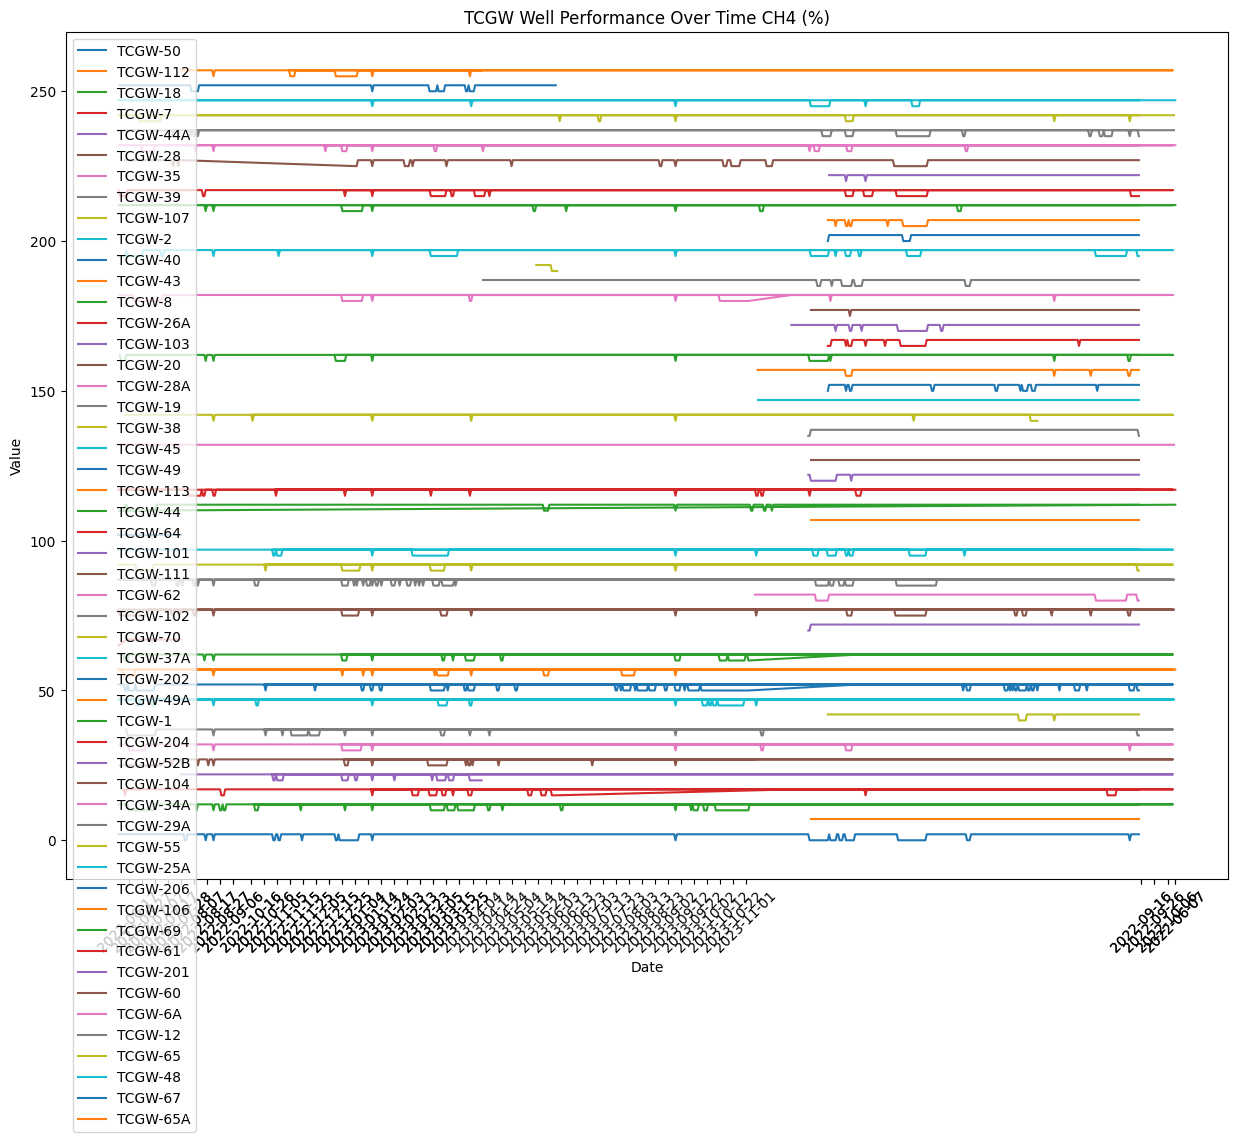

In [ ]:
# Function to standardize names by removing leading zeros
def standardize_name(name):
    return re.sub(r'-(0+)', '-', name)


#gw_averages_df
GWwells = gw_averages_df["Well"].unique()


#standardize gw wells
standardized_GWwells = list(set([standardize_name(name) for name in GWwells]))

# take 1/2 of them
midlen = round(len(standardized_GWwells)/2)
GWwells1 = standardized_GWwells[:midlen]
GWwells2 = standardized_GWwells[midlen:]

# loop thru for every header
desired_valsGW_df = gw_averages_df.loc[:, [param]]
days = gw_averages_df["day"]
bin_df = desired_valsGW_df.notna().astype(int) # turn NaN into 0 and actual values into 1

#merge all necessary columns into 1 dataframe
binary_gw_df = pd.merge(bin_df, gw_averages_df["day"], left_index=True, right_index=True)
binary_gw_df = pd.merge(binary_gw_df, gw_averages_df["Well"], left_index=True, right_index=True)

#standardize the names of wells
binary_gw_df['standardized_GWwells'] = binary_gw_df['Well'].apply(standardize_name)

#plot


offset = 0
plt.clf()
plt.figure(figsize=(15, 11))
for wells in GWwells1:
  #reconfigure dataframe for current well
  group_df = binary_gw_df[binary_gw_df['standardized_GWwells'] == wells]

  group_df = group_df.sort_values(by='day')  # Sort by day

  # Plot the section
  plt.plot(group_df['day'], group_df[param] * 2 + offset, label=f'{wells}')

  offset += 5

# label x every 10 days to clean up chart
sub_df = binary_gw_df.iloc[0: binary_gw_df['standardized_GWwells'].value_counts().get(GWwells[1], 0)]
xticks = sub_df['day'][::10]
plt.xticks(ticks=xticks, labels=xticks)
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'TCGW Well Performance Over Time {param}')
plt.legend()
plt.grid(False)
plt.show()

# Unhelpful, but it seems like their system was down/everything was broken on 1-12-2023

In [ ]:
midlen

104

# Checking number of null values in each row

In [ ]:
# ok plan

# take all the data
#find the # of null values per row
#plot?

# using daily_averages_df

def count_nulls_per_row(df):
    """
    Takes a DataFrame and returns a Series with the count of null values per row.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    pd.Series: A Series where the index corresponds to the DataFrame's index, and the values are the count of null values in that row.
    """
    # Count the number of null values in each row
    null_counts = df.isnull().sum(axis=1)
    return null_counts

#null count for headers
desired_cols = ['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. (%)']
null_count_headers = count_nulls_per_row(header_averages_df[desired_cols])
null_count_lc = count_nulls_per_row(lc_averages_df[desired_cols])
null_count_gw = count_nulls_per_row(gw_averages_df[desired_cols])

In [ ]:
#sum(null_count_headers)
#sum(null_count_lc)
(null_count_gw)

# check how many times each number occurs
# plot
value_counts = null_count_gw.values.flatten()
value_counts = pd.Series(value_counts).value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(f'Frequency of number of null values for Gas Wells {desired_cols}')
plt.show()

# Percent of Nan Values that are yellow or green

In [ ]:
merged_df

,level_0,index,Timestamp (US/Eastern),CH4 (%),CO2 (%),O2 (%),Bal. Gas (%),LFG Flow (SCFM),LFG Temperature (F),Applied Vacuum - PA (in. H2O),Available Vacuum - PB (in. H2O),Static Pressure - PS (in. H2O),Valve Position (%),Liquid Column (feet),Well,day,Follow Up Priority
0,568,7580,2022-12-26 07:02:50,57.3,39.9,0.3,2.5,55.4,85.8,-6.3,-5.8,NaN,74.9,NaN,TCLC-412,2022-12-26,Yellow
1,569,7581,2022-12-28 11:18:09,57.8,41.0,0.2,1.1,69.5,89.9,-10.2,-14.0,NaN,74.9,NaN,TCLC-412,2022-12-28,Yellow
2,570,7582,2022-12-28 14:23:31,58.0,41.1,0.1,0.8,67.9,89.4,-9.7,-14.2,NaN,73.7,NaN,TCLC-412,2022-12-28,Yellow
3,571,7583,2022-12-28 17:32:20,58.0,41.2,0.0,0.8,69.4,88.8,-10.0,-14.3,NaN,74.5,NaN,TCLC-412,2022-12-28,Yellow
4,572,7584,2022-12-28 20:48:17,55.0,39.2,0.3,5.4,70.0,88.5,-10.5,-13.4,NaN,75.3,NaN,TCLC-412,2022-12-28,Yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744033,1186320,1193332,2024-08-31 20:49:19,52.1,43.4,0.0,4.6,NaN,75.9,-4.2,-14.2,NaN,19.1,12.7,TCGW-001,2024-08-31,Green
744034,1186321,1193333,2024-08-31 21:09:58,NaN,NaN,NaN,NaN,NaN,76.0,-4.6,-14.3,NaN,18.0,NaN,TCGW-001,2024-08-31,Green
744035,1186322,1193334,2024-08-31 22:06:49,NaN,NaN,NaN,NaN,NaN,76.7,-5.0,-14.3,NaN,18.0,NaN,TCGW-001,2024-08-31,Green
744036,1186323,1193335,2024-08-31 23:03:48,NaN,NaN,NaN,NaN,NaN,75.4,-5.0,-14.1,NaN,18.0,NaN,TCGW-001,2024-08-31,Green


In [ ]:
def frac_nan_yg(nan_indices):
  x = merged_df.iloc[list(nan_indices)]
  yellow_rows = x[x["Follow Up Priority"] == "Yellow"]
  green_rows = x[x["Follow Up Priority"] == "Green"]
  return len(yellow_rows), len(green_rows), len(x)


In [ ]:
nan_indices_ch4 = set(merged_df[merged_df["CH4 (%)"].isna()].index)
nan_indices_co2 = set(merged_df[merged_df["CO2 (%)"].isna()].index)
nan_indices_o2 = set(merged_df[merged_df["O2 (%)"].isna()].index)
nan_indices_bal = set(merged_df[merged_df["Bal. Gas (%)"].isna()].index)
nan_indices_lfg = set(merged_df[merged_df["LFG Flow (SCFM)"].isna()].index)
nan_indices_temp = set(merged_df[merged_df["LFG Temperature (F)"].isna()].index)
nan_indices_pb = set(merged_df[merged_df["Available Vacuum - PB (in. H2O)"].isna()].index)
nan_indices_pa = set(merged_df[merged_df["Applied Vacuum - PA (in. H2O)"].isna()].index)
nan_indices_liquid = set(merged_df[merged_df["Liquid Column (feet)"].isna()].index)


y_ch4, g_ch4 = frac_nan_yg(nan_indices_ch4)
y_co2, g_co2 = frac_nan_yg(nan_indices_co2)
y_o2, g_o2 = frac_nan_yg(nan_indices_o2)
y_bal, g_bal = frac_nan_yg(nan_indices_bal)
y_lfg, g_lfg = frac_nan_yg(nan_indices_lfg)
y_temp, g_temp = frac_nan_yg(nan_indices_temp)
y_pb, g_pb = frac_nan_yg(nan_indices_pb)
y_pa, g_pa = frac_nan_yg(nan_indices_pa)
y_liquid, g_liquid = frac_nan_yg(nan_indices_liquid)


# print(len(union_gas))
# print(len(union_select))
print(len(merged_df))
print("PERCENT of Nan CH4 yellow", round((y_ch4)/len(nan_indices_ch4), 5))
print("PERCENT of Nan CH4 green", round((g_ch4)/len(nan_indices_ch4), 5))
print("PERCENT of Nan CO2 yellow", round((y_co2)/len(nan_indices_co2), 5))
print("PERCENT of Nan CO2 green", round((g_co2)/len(nan_indices_co2), 5))
print("PERCENT of Nan O2 yellow", round((y_o2)/len(nan_indices_o2), 5))
print("PERCENT of Nan O2 green", round((g_o2)/len(nan_indices_o2), 5))
print("PERCENT of Nan Bal yellow", round((y_bal)/len(nan_indices_bal), 5))
print("PERCENT of Nan Bal green", round((g_bal)/len(nan_indices_bal), 5))
print("PERCENT of Nan Lfg yellow", round((y_lfg)/len(nan_indices_lfg), 5))
print("PERCENT of Nan Lfg green", round((g_lfg)/len(nan_indices_lfg), 5))
# print("PERCENT of Nan Temp yellow", round((y_temp)/len(nan_indices_temp), 5))
# print("PERCENT of Nan Temp green", round((g_temp)/len(nan_indices_temp), 5))
print("PERCENT of Nan Pb yellow", round((y_pb)/len(nan_indices_pb), 5))
print("PERCENT of Nan Pb green", round((g_pb)/len(nan_indices_pb), 5))
print("PERCENT of Nan Pa yellow", round((y_pa)/len(nan_indices_pa), 5))
print("PERCENT of Nan Pa green", round((g_pa)/len(nan_indices_pa), 5))
print("PERCENT of Nan Liquid yellow", round((y_liquid)/len(nan_indices_liquid), 5))
print("PERCENT of Nan Liquid green", round((g_liquid)/len(nan_indices_liquid), 5))

744038
PERCENT of Nan CH4 yellow 0.18292
PERCENT of Nan CH4 green 0.81708
PERCENT of Nan CO2 yellow 0.1831
PERCENT of Nan CO2 green 0.8169
PERCENT of Nan O2 yellow 0.18293
PERCENT of Nan O2 green 0.81707
PERCENT of Nan Bal yellow 0.18308
PERCENT of Nan Bal green 0.81692
PERCENT of Nan Lfg yellow 0.24535
PERCENT of Nan Lfg green 0.75465
PERCENT of Nan Pb yellow 0.51047
PERCENT of Nan Pb green 0.48953
PERCENT of Nan Pa yellow 0.67023
PERCENT of Nan Pa green 0.32977
PERCENT of Nan Liquid yellow 0.17972
PERCENT of Nan Liquid green 0.82028


In [ ]:
# What percent of "Yellow" + "Green" indices are NaN

473420

In [ ]:
nan_indices_ch4 = set(merged_df[merged_df["CH4 (%)"].isna()].index)
nan_indices_co2 = set(merged_df[merged_df["CO2 (%)"].isna()].index)
nan_indices_o2 = set(merged_df[merged_df["O2 (%)"].isna()].index)
nan_indices_bal = set(merged_df[merged_df["Bal. Gas (%)"].isna()].index)
nan_indices_lfg = set(merged_df[merged_df["LFG Flow (SCFM)"].isna()].index)
nan_indices_temp = set(merged_df[merged_df["LFG Temperature (F)"].isna()].index)
nan_indices_pb = set(merged_df[merged_df["Available Vacuum - PB (in. H2O)"].isna()].index)
nan_indices_pa = set(merged_df[merged_df["Applied Vacuum - PA (in. H2O)"].isna()].index)
nan_indices_liquid = set(merged_df[merged_df["Liquid Column (feet)"].isna()].index)


y_ch4, g_ch4 = frac_nan_yg(nan_indices_ch4)
y_co2, g_co2 = frac_nan_yg(nan_indices_co2)
y_o2, g_o2 = frac_nan_yg(nan_indices_o2)
y_bal, g_bal = frac_nan_yg(nan_indices_bal)
y_lfg, g_lfg = frac_nan_yg(nan_indices_lfg)
y_temp, g_temp = frac_nan_yg(nan_indices_temp)
y_pb, g_pb = frac_nan_yg(nan_indices_pb)
y_pa, g_pa = frac_nan_yg(nan_indices_pa)
y_liquid, g_liquid = frac_nan_yg(nan_indices_liquid)


# print(len(union_gas))
# print(len(union_select))


y_prop = (109465 / 744038)
g_prop = (624573 / 744038)
print(y_prop)
print(g_prop)

print(len(merged_df))
print("PERCENT of Nan CH4 yellow", round(((y_ch4)/len(nan_indices_ch4))-y_prop, 5))
print("PERCENT of Nan CH4 green", round(((g_ch4)/len(nan_indices_ch4))-g_prop, 5))
print("PERCENT of Nan CO2 yellow", round(((y_co2)/len(nan_indices_co2))-y_prop, 5))
print("PERCENT of Nan CO2 green", round(((g_co2)/len(nan_indices_co2))-g_prop, 5))
print("PERCENT of Nan O2 yellow", round(((y_o2)/len(nan_indices_o2))-y_prop, 5))
print("PERCENT of Nan O2 green", round(((g_o2)/len(nan_indices_o2))-g_prop, 5))
print("PERCENT of Nan Bal yellow", round(((y_bal)/len(nan_indices_bal))-y_prop, 5))
print("PERCENT of Nan Bal green", round(((g_bal)/len(nan_indices_bal))-g_prop, 5))
print("PERCENT of Nan Lfg yellow", round(((y_lfg)/len(nan_indices_lfg))-y_prop, 5))
print("PERCENT of Nan Lfg green", round(((g_lfg)/len(nan_indices_lfg))-g_prop, 5))
# print("PERCENT of Nan Temp yellow", round((y_temp)/len(nan_indices_temp), 5))
# print("PERCENT of Nan Temp green", round((g_temp)/len(nan_indices_temp), 5))
print("PERCENT of Nan Pb yellow", round(((y_pb)/len(nan_indices_pb))-y_prop, 5))
print("PERCENT of Nan Pb green", round(((g_pb)/len(nan_indices_pb))-g_prop, 5))
print("PERCENT of Nan Pa yellow", round(((y_pa)/len(nan_indices_pa))-y_prop, 5))
print("PERCENT of Nan Pa green", round(((g_pa)/len(nan_indices_pa))-g_prop, 5))
print("PERCENT of Nan Liquid yellow", round(((y_liquid)/len(nan_indices_liquid))-y_prop, 5))
print("PERCENT of Nan Liquid green", round(((g_liquid)/len(nan_indices_liquid))-g_prop, 5))

0.14712286200436
0.8394369642410737
744038
PERCENT of Nan CH4 yellow 0.0358
PERCENT of Nan CH4 green -0.02235
PERCENT of Nan CO2 yellow 0.03598
PERCENT of Nan CO2 green -0.02253
PERCENT of Nan O2 yellow 0.03581
PERCENT of Nan O2 green -0.02237
PERCENT of Nan Bal yellow 0.03596
PERCENT of Nan Bal green -0.02252
PERCENT of Nan Lfg yellow 0.09823
PERCENT of Nan Lfg green -0.08479
PERCENT of Nan Pb yellow 0.36334
PERCENT of Nan Pb green -0.3499
PERCENT of Nan Pa yellow 0.52311
PERCENT of Nan Pa green -0.50967
PERCENT of Nan Liquid yellow 0.0326
PERCENT of Nan Liquid green -0.01916
